# RoBERTa model construction with 'EA' data

2020/11/10

Student: Xuanyu Su                                                                 
Supervisor: Isar Nejadgholi

In this notebook, we use the parameters set from paper: Detecting East Asian Prejudice on Social Media. and following the operation the author did in the paper. Then we constructed a model by using RoBERTa base model and the same parameter used in the paper.

We also test the model in 2400 Covid dataset, and fine-tuning the model twice.

## data preprocessing

In [1]:
import pandas as pd

In [2]:
EA_data = pd.read_csv('hs_AsianPrejudice_20kdataset_cleaned_anonymized.tsv',sep = '\t')

In [3]:
EA_data.head()

,id,annot1,annot2,expert,text,text.clean,annot1.name,annot2.name,expert.name,target.annot1.clean,...,hashtags.annotator1,hashtags.annotator2,hashtags.decision,East Asia,China,Hong Kong,Japan,Korea,Singapore,Taiwan
0,idstr_1212372663416639488,none_of_the_above,none_of_the_above,none_of_the_above,@CNN No doubt a ChiNa female. #shameonchina #B...,@cnn no doubt a china female. HASHTAG_EASTASIA...,annotator_GNZuCtwed3,annotator_gbEGjSAk6r,expert_GNZuCtwed3,NaN,...,hashtags_not_used_at_all_to_identify_themes,hashtags_not_used_at_all_to_identify_themes,agree,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,idstr_1212374922993053696,none_of_the_above,none_of_the_above,none_of_the_above,@KongTsungGan The #HongKongPoliceBrutality is ...,@kongtsunggan the HASHTAG_EASTASIA is happenin...,annotator_CAgNlUizNm,annotator_cYKSVBW4HD,expert_GNZuCtwed3,NaN,...,hashtags_not_used_at_all_to_identify_themes,hashtags_only_used_to_identify_covid_relevance,disagree,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,idstr_1213452156251987973,none_of_the_above,none_of_the_above,none_of_the_above,Afraid. #ChinaPneumonia,afraid. #HASHTAG,annotator_vDe7GN0NrL,annotator_HtRmsP3KiK,expert_CAgNlUizNm,NaN,...,hashtags_not_used_at_all_to_identify_themes,hashtags_not_used_at_all_to_identify_themes,agree,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,idstr_1213471445294075909,none_of_the_above,none_of_the_above,none_of_the_above,RT @shapponeko @Mugisalty @CatBus2D everybody ...,rt @shapponeko @mugisalty @catbus2d everybody ...,annotator_TbUBpfn6iP,annotator_dqrONtdjbt,expert_GNZuCtwed3,NaN,...,hashtags_not_used_at_all_to_identify_themes,hashtags_not_used_at_all_to_identify_themes,agree,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,idstr_1213494381073711105,entity_directed_hostility,entity_directed_hostility,entity_directed_hostility,RT @JAbbott45624607 @annie_sparrow This makes ...,rt @jabbott45624607 @annie_sparrow this makes ...,annotator_oemYWm1Tjg,annotator_IBsVsBliwX,expert_GNZuCtwed3,China,...,hashtags_not_used_at_all_to_identify_themes,hashtags_only_used_to_identify_covid_relevance,disagree,NaN,1.0,NaN,NaN,NaN,NaN,NaN


In [4]:
EA_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      20000 non-null  object 
 1   annot1                  19998 non-null  object 
 2   annot2                  20000 non-null  object 
 3   expert                  20000 non-null  object 
 4   text                    20000 non-null  object 
 5   text.clean              20000 non-null  object 
 6   annot1.name             20000 non-null  object 
 7   annot2.name             20000 non-null  object 
 8   expert.name             20000 non-null  object 
 9   target.annot1.clean     5443 non-null   object 
 10  target.annot2.clean     5129 non-null   object 
 11  hostile.threatening     3908 non-null   object 
 12  hostile.dehumanization  3908 non-null   object 
 13  hostile.interpersonal   3908 non-null   object 
 14  COVID relevant          20000 non-null

In [5]:
[print(EA_data['text'][i],'------') for i in range(5)][0]

@CNN No doubt a ChiNa female. #shameonchina #BoycottBeijing2022 ------
@KongTsungGan The #HongKongPoliceBrutality is happening behind the live stream. They are cooperating with the CCP. #Shameonchina #BoycottBeijing2022 ------
Afraid.  #ChinaPneumonia ------
RT @shapponeko @Mugisalty @CatBus2D everybody should wear masks!  #ChinaPneumonia ------
RT @JAbbott45624607 @annie_sparrow This makes me remember the sad days in 2003, china covered up the SARS situation and allowed it to spread to HK. Causing 299 dead and many suffered.   Stop the #chinesepneumonia from spreading! ------


In [6]:
[print(EA_data['hashtags.annotator1'][i],'------') for i in range(5)][0]

hashtags_not_used_at_all_to_identify_themes ------
hashtags_not_used_at_all_to_identify_themes ------
hashtags_not_used_at_all_to_identify_themes ------
hashtags_not_used_at_all_to_identify_themes ------
hashtags_not_used_at_all_to_identify_themes ------


In [7]:
[print(EA_data['hashtags.annotator2'][i],'------') for i in range(5)][0]

hashtags_not_used_at_all_to_identify_themes ------
hashtags_only_used_to_identify_covid_relevance ------
hashtags_not_used_at_all_to_identify_themes ------
hashtags_not_used_at_all_to_identify_themes ------
hashtags_only_used_to_identify_covid_relevance ------


In [8]:
[print(EA_data['hashtags.decision'][i],'------') for i in range(5)][0]

agree ------
disagree ------
agree ------
agree ------
disagree ------


## types and numbers of hashtag themes

In [9]:
ap = EA_data.groupby(by=['hashtags.annotator1'])
ap.size()

hashtags.annotator1
hashtags_needed_to_identify_both_themes                 4835
hashtags_not_used_at_all_to_identify_themes            10769
hashtags_only_used_to_identify_covid_relevance          4239
hashtags_only_used_to_identify_east_asian_relevance      157
dtype: int64

In [10]:
ap = EA_data.groupby(by=['hashtags.annotator2'])
ap.size()

hashtags.annotator2
hashtags_needed_to_identify_both_themes                 1407
hashtags_not_used_at_all_to_identify_themes             7119
hashtags_only_used_to_identify_covid_relevance         10310
hashtags_only_used_to_identify_east_asian_relevance     1164
dtype: int64

In [11]:
ap = EA_data.groupby(by=['hashtags.decision'])
ap.size()

hashtags.decision
agree       11151
disagree     8849
dtype: int64

## types and numbers of data labels

In [12]:
ap = EA_data.groupby(by=['expert'])
ap.size()

expert
counter_speech                         116
discussion_of_eastasian_prejudice     1029
entity_directed_criticism             1433
entity_directed_hostility             3898
none_of_the_above                    13524
dtype: int64

In [13]:
ap = EA_data.groupby(by=['Singapore'])
ap.size()

Singapore
1.0    1
dtype: int64

In [14]:
count = 0
for i in EA_data[EA_data['East Asia'] == 1]['expert']:
    if i == 'discussion_of_eastasian_prejudice':
        count+=1
count/len(EA_data[EA_data['East Asia'] == 1]['expert'])

0.013888888888888888

## Combine hashtag decision (combine counter_speech with discussion together)

In [15]:
from tqdm import tqdm
relevant1 = []
relevant2 = []
for i in tqdm(EA_data['hashtags.annotator1']):
    if i == 'hashtags_not_used_at_all_to_identify_themes':
        relevant1.append(0)
    else:
        relevant1.append(1)
for i in tqdm(EA_data['hashtags.annotator2']):
    if i == 'hashtags_not_used_at_all_to_identify_themes':
        relevant2.append(0)
    else:
        relevant2.append(1)

100%|███████████████████████████████████████████████████████████████████████| 20000/20000 [00:00<00:00, 2227931.58it/s]


In [16]:
final_decision = []
for i in range(len(relevant1)):
    sum_temp = relevant1[i] + relevant2[i]
    if sum_temp > 1:
        final_decision.append(1)
    else:
        final_decision.append(0)

In [17]:
print("Tag keep ratio is:",final_decision.count(1)/len(final_decision))

Tag keep ratio is: 0.3807


In [18]:
import re
from tqdm import tqdm
import emoji

class Word_Preprocessing():
    def eliminate_url(self,df,target):
        print('Start eliminate url: : )')
        df_temp = df
        target_column_name = target
        text = df_temp[target_column_name]
        for i in tqdm(text):
            urls = re.findall(r'(https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9]+\.[^\s]{2,}|www\.[a-zA-Z0-9]+\.[^\s]{2,})', i)
            for i in urls:
                df_temp[target_column_name] = df_temp[target_column_name].apply(lambda x: x.replace(i, ""))
        return df_temp
    
    def eliminate_username(self,df,target):
        print('Start eliminate username: : )')
        df_temp = df
        target_column_name = target
        for i in tqdm(df_temp[target_column_name]):
            user_name = re.findall(r'@\w*', i)
            for i in user_name:
                df_temp[target_column_name] = df_temp[target_column_name].apply(lambda x: x.replace(i, ""))
        return df_temp
     
    
    def convert_abbreviation(self, df, target):
        df_temp = df
        target_column_name = target
        am = "'m"
        are = "'re"
        have = "'ve"
        not_ = "n't"
        df_temp[target_column_name] = df_temp[target_column_name].apply(lambda x: x.replace(am, " am"))
        df_temp[target_column_name] = df_temp[target_column_name].apply(lambda x: x.replace(are, "  are"))
        df_temp[target_column_name] = df_temp[target_column_name].apply(lambda x: x.replace(have, " have"))
        df_temp[target_column_name] = df_temp[target_column_name].apply(lambda x: x.replace(not_, " not"))
        return df_temp
    
    
    def final_check(self,df,target):
        print('Start Final check: ')
        df_temp = df
        target_column_name = target
        df_temp[target_column_name] = df_temp[target_column_name].apply(lambda x:re.sub(r'[^A-Za-z0-9 ]+', ' ', x).lower())
        return df_temp
            
    def eliminate_symbol(self,df,target):
        print('Start eliminate symbol: : )')
        df_temp = df
        target_column_name = target
        symbol_list = [',',"'",'!','@','$','%','^','&','*','(',')','-','+','?','>','<','=','.',':',';','  ','  ','   ','    ','      ','      ','  ']
        for i in tqdm(symbol_list):
            df_temp[target_column_name] = df_temp[target_column_name].apply(lambda x: x.replace(i, ' '))
        return df_temp
    
    def process_all(self, df,target):
        df_temp = df
        target_column_name = target
        df_fresh = self.convert_abbreviation(df_temp,target_column_name)
        df_remove_url = self.eliminate_url(df_fresh,target_column_name)
        df_remove_username = self.eliminate_username(df_remove_url, target_column_name)
        df_remove_symbol = self.eliminate_symbol(df_remove_username, target_column_name)
        df_final_check = self.final_check(df_remove_symbol, target_column_name)
        print("finished!!")
        return df_final_check

In [19]:
processor = Word_Preprocessing()

In [20]:
new_EA = processor.process_all(EA_data, 'text.clean')

  0%|▏                                                                             | 36/20000 [00:00<00:59, 337.35it/s]

Start eliminate url: : )


  0%|                                                                              | 16/20000 [00:00<02:09, 154.21it/s]

Start eliminate username: : )


 59%|████████████████████████████████████████████████                                 | 16/27 [00:00<00:00, 157.23it/s]

Start eliminate symbol: : )


100%|█████████████████████████████████████████████████████████████████████████████████| 27/27 [00:00<00:00, 127.70it/s]


Start Final check: 
finished!!


In [21]:
[print(EA_data['text.clean'][i],'------') for i in range(10)][0]

 no doubt a china female hashtag eastasia  hashtag ------
 the hashtag eastasia is happening behind the live stream they are cooperating with the ccp hashtag eastasia  hashtag ------
afraid  hashtag ------
rt everybody should wear masks  hashtag ------
rt this makes me remember the sad days in 2003 china covered up the sars situation and allowed it to spread to hk causing 299 dead and many suffered stop the hashtag eastasia virus from spreading  ------
 thats how sars started in hong kong in 2003 mainland chinese government tried to cover things up until its broke out in hong kong hundreds of hong kong citizens and medics were dead due to no cure at early stage of eruption  hashtag ------
 before you wear n95 masks you should look into getting a fit test because unlike surgical masks one size does not fit all for n95 masks having best fit n95 for your face will ensure a good face seal for protection  hashtag hashtag eastasia virus  ------
please wear a mask when you come to hong kong  

In [22]:
new_EA['text.clean'] = new_EA['text.clean'].apply(lambda x: x.replace('hashtag', ""))

In [23]:
new_EA['text.clean'] = new_EA['text.clean'].apply(lambda x: x.replace('rt', ""))

In [24]:
new_EA = processor.eliminate_symbol(new_EA, 'text.clean')

  0%|                                                                                           | 0/27 [00:00<?, ?it/s]

Start eliminate symbol: : )


100%|█████████████████████████████████████████████████████████████████████████████████| 27/27 [00:00<00:00, 161.14it/s]


In [25]:
[print(new_EA['text.clean'][i],'------') for i in range(10)][0]

 no doubt a china female eastasia  ------
 the eastasia is happening behind the live stream they are cooperating with the ccp eastasia  ------
afraid  ------
 everybody should wear masks  ------
 this makes me remember the sad days in 2003 china covered up the sars situation and allowed it to spread to hk causing 299 dead and many suffered stop the eastasia virus from spreading  ------
 thats how sars staed in hong kong in 2003 mainland chinese government tried to cover things up until its broke out in hong kong hundreds of hong kong citizens and medics were dead due to no cure at early stage of eruption  ------
 before you wear n95 masks you should look into getting a fit test because unlike surgical masks one size does not fit all for n95 masks having best fit n95 for your face will ensure a good face seal for protection eastasia virus  ------
please wear a mask when you come to hong kong  ------
hongkongers pls protect ourselves  ------
 we call it chinese pneumonia before we have m

In [26]:
new_EA = new_EA[['text.clean', 'expert']]

<ipython-input-27-2181c76f21a9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_EA['length'] = new_EA['text.clean'].apply(lambda x: len(x.split()))


Text(0.5, 0, 'length')

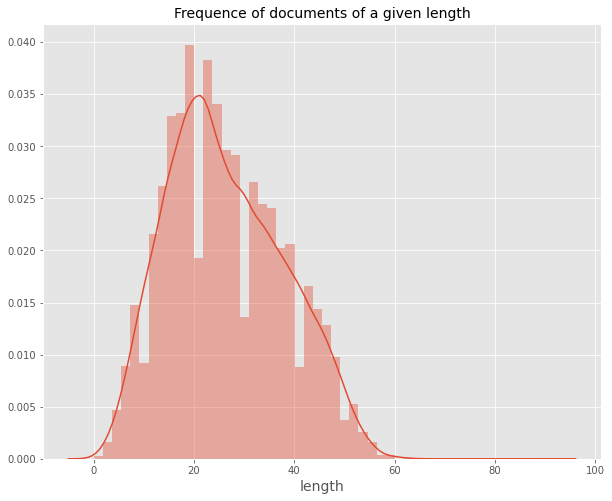

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plot histogram with the length. Truncate max length to 5000 tokens.
plt.style.use("ggplot")

plt.figure(figsize=(10, 8))
new_EA['length'] = new_EA['text.clean'].apply(lambda x: len(x.split()))
sns.distplot(new_EA[new_EA['length'] < 150]['length'])
plt.title('Frequence of documents of a given length', fontsize=14)
plt.xlabel('length', fontsize=14)

In [28]:
new_EA = new_EA.drop(columns=['length'])

## the distribution before combine labels ( the number of counter_speech is too few to be recognized)

In [29]:
ap = new_EA.groupby(by=['expert'])
ap.size()

expert
counter_speech                         116
discussion_of_eastasian_prejudice     1029
entity_directed_criticism             1433
entity_directed_hostility             3898
none_of_the_above                    13524
dtype: int64

In [30]:
mixed_label = []
for i in tqdm(new_EA['expert']):
    if i == 'counter_speech':
        mixed_label.append('counter_speech+discussion_of_eastasian_prejudice')
    elif i == 'discussion_of_eastasian_prejudice':
        mixed_label.append('counter_speech+discussion_of_eastasian_prejudice')
    else:
        mixed_label.append(i)

100%|███████████████████████████████████████████████████████████████████████| 20000/20000 [00:00<00:00, 1542533.93it/s]


In [31]:
new_EA['expert'] = mixed_label

In [32]:
import numpy as np
label_final = list(np.unique(new_EA['expert']))

In [33]:
Final_label = []
for i in tqdm(new_EA['expert']):
    temp_list = [0 for i in range(len(label_final))]
    index = label_final.index(i)
    temp_list[index] = 1
    Final_label.append(temp_list)

100%|████████████████████████████████████████████████████████████████████████| 20000/20000 [00:00<00:00, 770211.82it/s]


In [34]:
new_EA['expert'] = Final_label

In [35]:
new_EA.rename(columns= {'text.clean':'comment'},inplace=True)

In [36]:
new_EA.rename(columns= {'expert':'label'},inplace=True)

In [37]:
new_EA.head()

,comment,label
0,no doubt a china female eastasia,"[0, 0, 0, 1]"
1,the eastasia is happening behind the live str...,"[0, 0, 0, 1]"
2,afraid,"[0, 0, 0, 1]"
3,everybody should wear masks,"[0, 0, 0, 1]"
4,this makes me remember the sad days in 2003 c...,"[0, 0, 1, 0]"


In [38]:
new_EA.to_csv('EA_final.csv',index=False, header=True)

In [39]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import torch
from torchtext.data import Field, TabularDataset, BucketIterator, Iterator

from transformers import RobertaTokenizer, RobertaModel, AdamW, get_linear_schedule_with_warmup

import warnings
warnings.filterwarnings('ignore')

import logging
logging.getLogger("transformers.tokenization_utils_base").setLevel(logging.ERROR)

# Set random seed and set device to GPU.
torch.manual_seed(17)

if torch.cuda.is_available():
    device = torch.device('cuda:0')
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
else:
    device = torch.device('cpu')

print(device)
# Initialize tokenizer.
tokenizer = RobertaTokenizer.from_pretrained("roberta-base")

cuda:0


In [40]:
# Sections of config

# Defining some key variables that will be used later on in the training
MAX_LEN = 80
TRAIN_BATCH_SIZE = 16
VALID_BATCH_SIZE = 8
LEARNING_RATE = 1e-5

In [41]:
from torch.utils.data import Dataset, DataLoader, RandomSampler, SequentialSampler
class CustomDataset(Dataset):

    def __init__(self, dataframe, tokenizer, max_len):
        self.tokenizer = tokenizer
        self.data = dataframe
        self.comment_text = dataframe.comment
        self.targets = self.data.label
        self.max_len = max_len

    def __len__(self):
        return len(self.comment_text)

    def __getitem__(self, index):
        comment_text = str(self.comment_text[index])
        comment_text = " ".join(comment_text.split())

        inputs = self.tokenizer.encode_plus(
            comment_text,
            None,
            add_special_tokens=True,
            max_length=self.max_len,
            pad_to_max_length=True,
            return_token_type_ids=False
        )
        ids = inputs['input_ids']
        mask = inputs['attention_mask']

        return {
            'ids': torch.tensor(ids, dtype=torch.long),
            'mask': torch.tensor(mask, dtype=torch.long),
            'targets': torch.tensor(self.targets[index], dtype=torch.float)
        }

In [42]:
# Creating the dataset and dataloader for the neural network

train_size = 0.8
val_size = 0.3
train_dataset=new_EA.sample(frac=train_size,random_state=200)
test_dataset=new_EA.drop(train_dataset.index).reset_index(drop=True)

val_dataset=test_dataset.sample(frac=val_size,random_state=200)
test_dataset=test_dataset.drop(val_dataset.index).reset_index(drop=True)

train_dataset = train_dataset.reset_index(drop=True)
val_dataset = val_dataset.reset_index(drop=True)

print("FULL Dataset: {}".format(new_EA.shape))
print("TRAIN Dataset: {}".format(train_dataset.shape))
print("Val Dataset: {}".format(val_dataset.shape))
print("TEST Dataset: {}".format(test_dataset.shape))

training_set = CustomDataset(train_dataset, tokenizer, MAX_LEN)
testing_set = CustomDataset(test_dataset, tokenizer, MAX_LEN)
val_set = CustomDataset(val_dataset, tokenizer, MAX_LEN)

FULL Dataset: (20000, 2)
TRAIN Dataset: (16000, 2)
Val Dataset: (1200, 2)
TEST Dataset: (2800, 2)


In [43]:
train_params = {'batch_size': TRAIN_BATCH_SIZE,
                'shuffle': True,
                'num_workers': 0
                }

val_params = {'batch_size': VALID_BATCH_SIZE,
                'shuffle': True,
                'num_workers': 0
                }
test_params = {'batch_size': VALID_BATCH_SIZE,
                'shuffle': False,
                'num_workers': 0
                }
training_loader = DataLoader(training_set, **train_params)
val_loader = DataLoader(val_set, **val_params)
test_loader = DataLoader(testing_set, **test_params)

In [44]:
# Model with extra layers on top of RoBERTa
class ROBERTAClassifier(torch.nn.Module):
    def __init__(self, dropout_rate=0.2):
        super(ROBERTAClassifier, self).__init__()
        
        self.roberta = RobertaModel.from_pretrained('roberta-base')
        self.d1 = torch.nn.Dropout(dropout_rate)
        self.l1 = torch.nn.Linear(768, 64)
        self.bn1 = torch.nn.LayerNorm(64)
        self.d2 = torch.nn.Dropout(dropout_rate)
        self.l2 = torch.nn.Linear(64, 4)
        
    def forward(self, input_ids, attention_mask):
        _, x = self.roberta(input_ids=input_ids, attention_mask=attention_mask)
        x1 = self.d1(x)
        x2 = self.l1(x1)
        x3 = self.bn1(x2)
        x4 = torch.nn.Tanh()(x3)
        x5 = self.d2(x4)
        x6 = self.l2(x5)
        return x6

In [45]:
model = ROBERTAClassifier()
model.to(device)

ROBERTAClassifier(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [46]:
def loss_fn(outputs, targets):
    return torch.nn.BCEWithLogitsLoss()(outputs, targets)

In [47]:
optimizer = torch.optim.Adam(params =  model.parameters(), lr=LEARNING_RATE)

In [48]:
# Training Function
def train(model,
          optimizer,
          train_iter,
          valid_iter,
          scheduler = None,
          num_epochs = 5,
          valid_period = int(len(train_dataset)/TRAIN_BATCH_SIZE)):
    
    # Initialize losses and loss histories
    train_loss = 0.0
    valid_loss = 0.0
    train_loss_list = []
    valid_loss_list = []
    best_valid_loss = float('Inf')
    
    global_step = 0
    global_steps_list = []
    
    model.train()
    
    # Train loop
    for epoch in range(num_epochs):
        count = 0
        for _,data in enumerate(train_iter, 0):
            source = data['ids'].to(device, dtype = torch.long)
            mask = data['mask'].to(device, dtype = torch.long)
            target = data['targets'].to(device, dtype = torch.float)
            y_pred = model(input_ids=source,  
                           attention_mask=mask)

            loss = torch.nn.BCEWithLogitsLoss()(y_pred, target)
            print('batch_no [{}/{}]:'.format(count, int(len(train_dataset)/TRAIN_BATCH_SIZE)),'training_loss:',loss)
            count+=1
            loss.backward()
            
            
            # Optimizer and scheduler step
            optimizer.step()    
            scheduler.step()
                
            optimizer.zero_grad()
            
            # Update train loss and global step
            train_loss += loss.item()
            global_step += 1

            # Validation loop. Save progress and evaluate model performance.
            if global_step % valid_period == 0:
                model.eval()
                
                with torch.no_grad():                    
                    for _,data in enumerate(valid_iter, 0):
                        source = data['ids'].to(device, dtype = torch.long)
                        mask = data['mask'].to(device, dtype = torch.long)
                        target = data['targets'].to(device, dtype = torch.float)
                        y_pred = model(input_ids=source, 
                                       attention_mask=mask)

                        
                        loss = torch.nn.BCEWithLogitsLoss()(y_pred, target)

                        
                        valid_loss += loss.item()

                # Store train and validation loss history
                train_loss = train_loss / valid_period
                valid_loss = valid_loss / len(valid_iter)
                train_loss_list.append(train_loss)
                valid_loss_list.append(valid_loss)
                global_steps_list.append(global_step)

                # print summary
                print('Epoch [{}/{}], global step [{}/{}], Train Loss: {:.4f}, Valid Loss: {:.4f}'
                      .format(epoch+1, num_epochs, global_step, num_epochs*len(train_iter),
                              train_loss, valid_loss))
                
                # checkpoint
                if best_valid_loss > valid_loss:
                    best_valid_loss = valid_loss
                        
                train_loss = 0.0                
                valid_loss = 0.0
                model.train()

    print('Training done!')

In [49]:
# Main training loop
NUM_EPOCHS = 5
steps_per_epoch = len(train_dataset)
LEARNING_RATE = 1e-05
print("======================= Start training =================================")
optimizer = torch.optim.Adam(params =  model.parameters(), lr=LEARNING_RATE)
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps=steps_per_epoch*2, 
                                            num_training_steps=steps_per_epoch*NUM_EPOCHS)

train(model=model, 
      train_iter=training_loader, 
      valid_iter=val_loader, 
      optimizer=optimizer, 
      scheduler=scheduler, 
      num_epochs=NUM_EPOCHS)

======================= Start training =================================
batch_no [0/1000]: training_loss: tensor(0.7477, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [1/1000]: training_loss: tensor(0.7598, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [2/1000]: training_loss: tensor(0.7481, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [3/1000]: training_loss: tensor(0.7622, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [4/1000]: training_loss: tensor(0.7137, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [5/1000]: training_loss: tensor(0.7569, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [6/1000]: training_loss: tensor(0.7868, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [7/1000]: training_loss: tensor(0.7697, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [8/100

batch_no [72/1000]: training_loss: tensor(0.7202, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [73/1000]: training_loss: tensor(0.7789, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [74/1000]: training_loss: tensor(0.7578, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [75/1000]: training_loss: tensor(0.7874, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [76/1000]: training_loss: tensor(0.7375, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [77/1000]: training_loss: tensor(0.7632, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [78/1000]: training_loss: tensor(0.7498, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [79/1000]: training_loss: tensor(0.7419, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [80/1000]: training_loss: tensor(0.7816, device='cuda:0', grad_fn=<Bina

batch_no [143/1000]: training_loss: tensor(0.7762, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [144/1000]: training_loss: tensor(0.7458, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [145/1000]: training_loss: tensor(0.7674, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [146/1000]: training_loss: tensor(0.7275, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [147/1000]: training_loss: tensor(0.7293, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [148/1000]: training_loss: tensor(0.7531, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [149/1000]: training_loss: tensor(0.7169, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [150/1000]: training_loss: tensor(0.7423, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [151/1000]: training_loss: tensor(0.7714, device='cuda:0', grad

batch_no [214/1000]: training_loss: tensor(0.7544, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [215/1000]: training_loss: tensor(0.7247, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [216/1000]: training_loss: tensor(0.7531, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [217/1000]: training_loss: tensor(0.7363, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [218/1000]: training_loss: tensor(0.7418, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [219/1000]: training_loss: tensor(0.7364, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [220/1000]: training_loss: tensor(0.6990, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [221/1000]: training_loss: tensor(0.7415, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [222/1000]: training_loss: tensor(0.6917, device='cuda:0', grad

batch_no [285/1000]: training_loss: tensor(0.7368, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [286/1000]: training_loss: tensor(0.7326, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [287/1000]: training_loss: tensor(0.7425, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [288/1000]: training_loss: tensor(0.6965, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [289/1000]: training_loss: tensor(0.7585, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [290/1000]: training_loss: tensor(0.7264, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [291/1000]: training_loss: tensor(0.7274, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [292/1000]: training_loss: tensor(0.7480, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [293/1000]: training_loss: tensor(0.7160, device='cuda:0', grad

batch_no [357/1000]: training_loss: tensor(0.7559, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [358/1000]: training_loss: tensor(0.7526, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [359/1000]: training_loss: tensor(0.7541, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [360/1000]: training_loss: tensor(0.7419, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [361/1000]: training_loss: tensor(0.7203, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [362/1000]: training_loss: tensor(0.7248, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [363/1000]: training_loss: tensor(0.7208, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [364/1000]: training_loss: tensor(0.7296, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [365/1000]: training_loss: tensor(0.7505, device='cuda:0', grad

batch_no [428/1000]: training_loss: tensor(0.7154, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [429/1000]: training_loss: tensor(0.7483, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [430/1000]: training_loss: tensor(0.7039, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [431/1000]: training_loss: tensor(0.7136, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [432/1000]: training_loss: tensor(0.7257, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [433/1000]: training_loss: tensor(0.6748, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [434/1000]: training_loss: tensor(0.6939, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [435/1000]: training_loss: tensor(0.6814, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [436/1000]: training_loss: tensor(0.6995, device='cuda:0', grad

batch_no [499/1000]: training_loss: tensor(0.6762, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [500/1000]: training_loss: tensor(0.6782, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [501/1000]: training_loss: tensor(0.7085, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [502/1000]: training_loss: tensor(0.6725, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [503/1000]: training_loss: tensor(0.6797, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [504/1000]: training_loss: tensor(0.7064, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [505/1000]: training_loss: tensor(0.6812, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [506/1000]: training_loss: tensor(0.6987, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [507/1000]: training_loss: tensor(0.6587, device='cuda:0', grad

batch_no [570/1000]: training_loss: tensor(0.6695, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [571/1000]: training_loss: tensor(0.6261, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [572/1000]: training_loss: tensor(0.6489, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [573/1000]: training_loss: tensor(0.6572, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [574/1000]: training_loss: tensor(0.6289, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [575/1000]: training_loss: tensor(0.6554, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [576/1000]: training_loss: tensor(0.6707, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [577/1000]: training_loss: tensor(0.6370, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [578/1000]: training_loss: tensor(0.6277, device='cuda:0', grad

batch_no [641/1000]: training_loss: tensor(0.5818, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [642/1000]: training_loss: tensor(0.6029, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [643/1000]: training_loss: tensor(0.5543, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [644/1000]: training_loss: tensor(0.5752, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [645/1000]: training_loss: tensor(0.5796, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [646/1000]: training_loss: tensor(0.5740, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [647/1000]: training_loss: tensor(0.5840, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [648/1000]: training_loss: tensor(0.5960, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [649/1000]: training_loss: tensor(0.5790, device='cuda:0', grad

batch_no [712/1000]: training_loss: tensor(0.5435, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [713/1000]: training_loss: tensor(0.5273, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [714/1000]: training_loss: tensor(0.5571, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [715/1000]: training_loss: tensor(0.5309, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [716/1000]: training_loss: tensor(0.5179, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [717/1000]: training_loss: tensor(0.5358, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [718/1000]: training_loss: tensor(0.5359, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [719/1000]: training_loss: tensor(0.4972, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [720/1000]: training_loss: tensor(0.5289, device='cuda:0', grad

batch_no [783/1000]: training_loss: tensor(0.4705, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [784/1000]: training_loss: tensor(0.4778, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [785/1000]: training_loss: tensor(0.5052, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [786/1000]: training_loss: tensor(0.5369, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [787/1000]: training_loss: tensor(0.3803, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [788/1000]: training_loss: tensor(0.4019, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [789/1000]: training_loss: tensor(0.4721, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [790/1000]: training_loss: tensor(0.4738, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [791/1000]: training_loss: tensor(0.4903, device='cuda:0', grad

batch_no [854/1000]: training_loss: tensor(0.4578, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [855/1000]: training_loss: tensor(0.4661, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [856/1000]: training_loss: tensor(0.4745, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [857/1000]: training_loss: tensor(0.4789, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [858/1000]: training_loss: tensor(0.4224, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [859/1000]: training_loss: tensor(0.4270, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [860/1000]: training_loss: tensor(0.4546, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [861/1000]: training_loss: tensor(0.4303, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [862/1000]: training_loss: tensor(0.4469, device='cuda:0', grad

batch_no [925/1000]: training_loss: tensor(0.4036, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [926/1000]: training_loss: tensor(0.3766, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [927/1000]: training_loss: tensor(0.4453, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [928/1000]: training_loss: tensor(0.5298, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [929/1000]: training_loss: tensor(0.3866, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [930/1000]: training_loss: tensor(0.3868, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [931/1000]: training_loss: tensor(0.3532, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [932/1000]: training_loss: tensor(0.6383, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [933/1000]: training_loss: tensor(0.4490, device='cuda:0', grad

batch_no [996/1000]: training_loss: tensor(0.3448, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [997/1000]: training_loss: tensor(0.4784, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [998/1000]: training_loss: tensor(0.4457, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [999/1000]: training_loss: tensor(0.4504, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Epoch [1/5], global step [1000/5000], Train Loss: 0.6294, Valid Loss: 0.4133
batch_no [0/1000]: training_loss: tensor(0.4468, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [1/1000]: training_loss: tensor(0.3990, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [2/1000]: training_loss: tensor(0.4531, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [3/1000]: training_loss: tensor(0.5520, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
bat

batch_no [67/1000]: training_loss: tensor(0.4203, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [68/1000]: training_loss: tensor(0.4289, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [69/1000]: training_loss: tensor(0.4831, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [70/1000]: training_loss: tensor(0.4203, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [71/1000]: training_loss: tensor(0.4292, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [72/1000]: training_loss: tensor(0.4277, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [73/1000]: training_loss: tensor(0.4522, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [74/1000]: training_loss: tensor(0.4743, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [75/1000]: training_loss: tensor(0.4694, device='cuda:0', grad_fn=<Bina

batch_no [138/1000]: training_loss: tensor(0.4896, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [139/1000]: training_loss: tensor(0.5212, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [140/1000]: training_loss: tensor(0.4958, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [141/1000]: training_loss: tensor(0.4196, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [142/1000]: training_loss: tensor(0.4175, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [143/1000]: training_loss: tensor(0.4544, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [144/1000]: training_loss: tensor(0.4856, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [145/1000]: training_loss: tensor(0.5125, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [146/1000]: training_loss: tensor(0.4114, device='cuda:0', grad

batch_no [209/1000]: training_loss: tensor(0.4152, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [210/1000]: training_loss: tensor(0.4488, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [211/1000]: training_loss: tensor(0.4945, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [212/1000]: training_loss: tensor(0.4504, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [213/1000]: training_loss: tensor(0.4733, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [214/1000]: training_loss: tensor(0.4717, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [215/1000]: training_loss: tensor(0.4355, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [216/1000]: training_loss: tensor(0.5037, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [217/1000]: training_loss: tensor(0.5180, device='cuda:0', grad

batch_no [280/1000]: training_loss: tensor(0.3992, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [281/1000]: training_loss: tensor(0.3913, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [282/1000]: training_loss: tensor(0.4445, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [283/1000]: training_loss: tensor(0.3157, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [284/1000]: training_loss: tensor(0.4193, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [285/1000]: training_loss: tensor(0.4999, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [286/1000]: training_loss: tensor(0.3623, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [287/1000]: training_loss: tensor(0.3611, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [288/1000]: training_loss: tensor(0.4189, device='cuda:0', grad

batch_no [351/1000]: training_loss: tensor(0.3791, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [352/1000]: training_loss: tensor(0.4526, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [353/1000]: training_loss: tensor(0.3730, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [354/1000]: training_loss: tensor(0.3844, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [355/1000]: training_loss: tensor(0.5673, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [356/1000]: training_loss: tensor(0.3610, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [357/1000]: training_loss: tensor(0.4888, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [358/1000]: training_loss: tensor(0.3982, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [359/1000]: training_loss: tensor(0.4186, device='cuda:0', grad

batch_no [422/1000]: training_loss: tensor(0.4031, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [423/1000]: training_loss: tensor(0.3913, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [424/1000]: training_loss: tensor(0.3702, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [425/1000]: training_loss: tensor(0.3905, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [426/1000]: training_loss: tensor(0.3839, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [427/1000]: training_loss: tensor(0.3404, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [428/1000]: training_loss: tensor(0.4420, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [429/1000]: training_loss: tensor(0.4041, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [430/1000]: training_loss: tensor(0.4731, device='cuda:0', grad

batch_no [493/1000]: training_loss: tensor(0.4472, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [494/1000]: training_loss: tensor(0.3827, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [495/1000]: training_loss: tensor(0.4044, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [496/1000]: training_loss: tensor(0.4272, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [497/1000]: training_loss: tensor(0.4971, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [498/1000]: training_loss: tensor(0.4512, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [499/1000]: training_loss: tensor(0.3945, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [500/1000]: training_loss: tensor(0.3660, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [501/1000]: training_loss: tensor(0.4760, device='cuda:0', grad

batch_no [564/1000]: training_loss: tensor(0.4185, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [565/1000]: training_loss: tensor(0.3834, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [566/1000]: training_loss: tensor(0.4245, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [567/1000]: training_loss: tensor(0.4147, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [568/1000]: training_loss: tensor(0.3673, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [569/1000]: training_loss: tensor(0.3888, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [570/1000]: training_loss: tensor(0.3987, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [571/1000]: training_loss: tensor(0.3885, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [572/1000]: training_loss: tensor(0.4489, device='cuda:0', grad

batch_no [635/1000]: training_loss: tensor(0.3810, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [636/1000]: training_loss: tensor(0.3698, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [637/1000]: training_loss: tensor(0.4248, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [638/1000]: training_loss: tensor(0.4780, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [639/1000]: training_loss: tensor(0.3982, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [640/1000]: training_loss: tensor(0.2984, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [641/1000]: training_loss: tensor(0.4239, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [642/1000]: training_loss: tensor(0.4406, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [643/1000]: training_loss: tensor(0.4575, device='cuda:0', grad

batch_no [706/1000]: training_loss: tensor(0.5195, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [707/1000]: training_loss: tensor(0.3785, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [708/1000]: training_loss: tensor(0.5038, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [709/1000]: training_loss: tensor(0.3854, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [710/1000]: training_loss: tensor(0.3107, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [711/1000]: training_loss: tensor(0.4922, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [712/1000]: training_loss: tensor(0.4207, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [713/1000]: training_loss: tensor(0.4433, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [714/1000]: training_loss: tensor(0.3571, device='cuda:0', grad

batch_no [777/1000]: training_loss: tensor(0.3571, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [778/1000]: training_loss: tensor(0.3954, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [779/1000]: training_loss: tensor(0.4128, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [780/1000]: training_loss: tensor(0.4215, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [781/1000]: training_loss: tensor(0.4371, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [782/1000]: training_loss: tensor(0.4068, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [783/1000]: training_loss: tensor(0.3941, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [784/1000]: training_loss: tensor(0.3987, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [785/1000]: training_loss: tensor(0.5001, device='cuda:0', grad

batch_no [848/1000]: training_loss: tensor(0.3802, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [849/1000]: training_loss: tensor(0.3908, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [850/1000]: training_loss: tensor(0.3584, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [851/1000]: training_loss: tensor(0.4587, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [852/1000]: training_loss: tensor(0.4429, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [853/1000]: training_loss: tensor(0.4320, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [854/1000]: training_loss: tensor(0.3076, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [855/1000]: training_loss: tensor(0.3758, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [856/1000]: training_loss: tensor(0.4418, device='cuda:0', grad

batch_no [919/1000]: training_loss: tensor(0.3474, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [920/1000]: training_loss: tensor(0.3703, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [921/1000]: training_loss: tensor(0.4914, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [922/1000]: training_loss: tensor(0.3347, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [923/1000]: training_loss: tensor(0.3513, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [924/1000]: training_loss: tensor(0.4031, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [925/1000]: training_loss: tensor(0.4848, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [926/1000]: training_loss: tensor(0.4505, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [927/1000]: training_loss: tensor(0.4302, device='cuda:0', grad

batch_no [990/1000]: training_loss: tensor(0.3915, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [991/1000]: training_loss: tensor(0.3745, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [992/1000]: training_loss: tensor(0.4287, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [993/1000]: training_loss: tensor(0.3890, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [994/1000]: training_loss: tensor(0.3870, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [995/1000]: training_loss: tensor(0.3866, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [996/1000]: training_loss: tensor(0.3883, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [997/1000]: training_loss: tensor(0.4242, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [998/1000]: training_loss: tensor(0.4012, device='cuda:0', grad

batch_no [61/1000]: training_loss: tensor(0.3183, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [62/1000]: training_loss: tensor(0.3337, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [63/1000]: training_loss: tensor(0.4190, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [64/1000]: training_loss: tensor(0.4658, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [65/1000]: training_loss: tensor(0.3313, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [66/1000]: training_loss: tensor(0.4441, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [67/1000]: training_loss: tensor(0.4067, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [68/1000]: training_loss: tensor(0.3705, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [69/1000]: training_loss: tensor(0.3790, device='cuda:0', grad_fn=<Bina

batch_no [132/1000]: training_loss: tensor(0.3769, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [133/1000]: training_loss: tensor(0.4199, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [134/1000]: training_loss: tensor(0.3506, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [135/1000]: training_loss: tensor(0.3355, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [136/1000]: training_loss: tensor(0.4130, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [137/1000]: training_loss: tensor(0.3305, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [138/1000]: training_loss: tensor(0.3986, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [139/1000]: training_loss: tensor(0.3352, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [140/1000]: training_loss: tensor(0.3477, device='cuda:0', grad

batch_no [203/1000]: training_loss: tensor(0.4361, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [204/1000]: training_loss: tensor(0.3914, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [205/1000]: training_loss: tensor(0.3427, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [206/1000]: training_loss: tensor(0.3732, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [207/1000]: training_loss: tensor(0.3878, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [208/1000]: training_loss: tensor(0.3734, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [209/1000]: training_loss: tensor(0.3593, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [210/1000]: training_loss: tensor(0.3457, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [211/1000]: training_loss: tensor(0.4092, device='cuda:0', grad

batch_no [274/1000]: training_loss: tensor(0.3104, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [275/1000]: training_loss: tensor(0.3137, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [276/1000]: training_loss: tensor(0.4151, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [277/1000]: training_loss: tensor(0.3047, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [278/1000]: training_loss: tensor(0.4141, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [279/1000]: training_loss: tensor(0.3639, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [280/1000]: training_loss: tensor(0.4349, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [281/1000]: training_loss: tensor(0.3980, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [282/1000]: training_loss: tensor(0.3968, device='cuda:0', grad

batch_no [345/1000]: training_loss: tensor(0.3791, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [346/1000]: training_loss: tensor(0.3007, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [347/1000]: training_loss: tensor(0.5598, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [348/1000]: training_loss: tensor(0.3664, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [349/1000]: training_loss: tensor(0.3719, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [350/1000]: training_loss: tensor(0.3524, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [351/1000]: training_loss: tensor(0.3438, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [352/1000]: training_loss: tensor(0.4228, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [353/1000]: training_loss: tensor(0.3996, device='cuda:0', grad

batch_no [416/1000]: training_loss: tensor(0.4957, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [417/1000]: training_loss: tensor(0.3594, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [418/1000]: training_loss: tensor(0.3392, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [419/1000]: training_loss: tensor(0.4682, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [420/1000]: training_loss: tensor(0.3720, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [421/1000]: training_loss: tensor(0.3551, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [422/1000]: training_loss: tensor(0.3743, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [423/1000]: training_loss: tensor(0.3633, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [424/1000]: training_loss: tensor(0.3395, device='cuda:0', grad

batch_no [487/1000]: training_loss: tensor(0.3439, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [488/1000]: training_loss: tensor(0.3420, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [489/1000]: training_loss: tensor(0.3917, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [490/1000]: training_loss: tensor(0.3790, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [491/1000]: training_loss: tensor(0.3466, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [492/1000]: training_loss: tensor(0.2868, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [493/1000]: training_loss: tensor(0.3110, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [494/1000]: training_loss: tensor(0.3367, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [495/1000]: training_loss: tensor(0.4351, device='cuda:0', grad

batch_no [558/1000]: training_loss: tensor(0.3710, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [559/1000]: training_loss: tensor(0.3390, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [560/1000]: training_loss: tensor(0.3559, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [561/1000]: training_loss: tensor(0.3734, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [562/1000]: training_loss: tensor(0.3968, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [563/1000]: training_loss: tensor(0.3247, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [564/1000]: training_loss: tensor(0.3421, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [565/1000]: training_loss: tensor(0.4418, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [566/1000]: training_loss: tensor(0.3793, device='cuda:0', grad

batch_no [629/1000]: training_loss: tensor(0.3422, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [630/1000]: training_loss: tensor(0.3860, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [631/1000]: training_loss: tensor(0.4174, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [632/1000]: training_loss: tensor(0.3785, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [633/1000]: training_loss: tensor(0.4301, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [634/1000]: training_loss: tensor(0.4050, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [635/1000]: training_loss: tensor(0.4135, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [636/1000]: training_loss: tensor(0.3144, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [637/1000]: training_loss: tensor(0.3025, device='cuda:0', grad

batch_no [700/1000]: training_loss: tensor(0.3821, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [701/1000]: training_loss: tensor(0.3814, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [702/1000]: training_loss: tensor(0.3431, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [703/1000]: training_loss: tensor(0.3794, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [704/1000]: training_loss: tensor(0.3344, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [705/1000]: training_loss: tensor(0.4860, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [706/1000]: training_loss: tensor(0.3835, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [707/1000]: training_loss: tensor(0.2483, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [708/1000]: training_loss: tensor(0.4866, device='cuda:0', grad

batch_no [771/1000]: training_loss: tensor(0.3315, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [772/1000]: training_loss: tensor(0.4579, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [773/1000]: training_loss: tensor(0.5131, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [774/1000]: training_loss: tensor(0.2875, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [775/1000]: training_loss: tensor(0.3193, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [776/1000]: training_loss: tensor(0.3246, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [777/1000]: training_loss: tensor(0.3690, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [778/1000]: training_loss: tensor(0.3947, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [779/1000]: training_loss: tensor(0.2754, device='cuda:0', grad

batch_no [842/1000]: training_loss: tensor(0.3180, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [843/1000]: training_loss: tensor(0.3533, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [844/1000]: training_loss: tensor(0.3192, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [845/1000]: training_loss: tensor(0.3093, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [846/1000]: training_loss: tensor(0.3336, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [847/1000]: training_loss: tensor(0.3519, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [848/1000]: training_loss: tensor(0.4585, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [849/1000]: training_loss: tensor(0.3887, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [850/1000]: training_loss: tensor(0.4157, device='cuda:0', grad

batch_no [913/1000]: training_loss: tensor(0.3641, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [914/1000]: training_loss: tensor(0.3776, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [915/1000]: training_loss: tensor(0.2783, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [916/1000]: training_loss: tensor(0.3557, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [917/1000]: training_loss: tensor(0.4197, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [918/1000]: training_loss: tensor(0.3223, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [919/1000]: training_loss: tensor(0.4070, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [920/1000]: training_loss: tensor(0.4250, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [921/1000]: training_loss: tensor(0.4355, device='cuda:0', grad

batch_no [984/1000]: training_loss: tensor(0.3796, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [985/1000]: training_loss: tensor(0.3004, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [986/1000]: training_loss: tensor(0.3469, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [987/1000]: training_loss: tensor(0.3924, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [988/1000]: training_loss: tensor(0.3733, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [989/1000]: training_loss: tensor(0.4101, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [990/1000]: training_loss: tensor(0.3683, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [991/1000]: training_loss: tensor(0.3554, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [992/1000]: training_loss: tensor(0.4317, device='cuda:0', grad

batch_no [55/1000]: training_loss: tensor(0.4408, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [56/1000]: training_loss: tensor(0.4109, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [57/1000]: training_loss: tensor(0.3664, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [58/1000]: training_loss: tensor(0.3176, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [59/1000]: training_loss: tensor(0.2903, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [60/1000]: training_loss: tensor(0.4413, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [61/1000]: training_loss: tensor(0.3381, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [62/1000]: training_loss: tensor(0.3582, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [63/1000]: training_loss: tensor(0.3670, device='cuda:0', grad_fn=<Bina

batch_no [127/1000]: training_loss: tensor(0.3385, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [128/1000]: training_loss: tensor(0.3676, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [129/1000]: training_loss: tensor(0.4760, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [130/1000]: training_loss: tensor(0.2892, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [131/1000]: training_loss: tensor(0.4196, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [132/1000]: training_loss: tensor(0.2994, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [133/1000]: training_loss: tensor(0.3481, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [134/1000]: training_loss: tensor(0.3030, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [135/1000]: training_loss: tensor(0.3450, device='cuda:0', grad

batch_no [198/1000]: training_loss: tensor(0.3591, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [199/1000]: training_loss: tensor(0.3435, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [200/1000]: training_loss: tensor(0.3345, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [201/1000]: training_loss: tensor(0.4626, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [202/1000]: training_loss: tensor(0.4733, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [203/1000]: training_loss: tensor(0.4168, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [204/1000]: training_loss: tensor(0.4284, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [205/1000]: training_loss: tensor(0.3747, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [206/1000]: training_loss: tensor(0.3436, device='cuda:0', grad

batch_no [269/1000]: training_loss: tensor(0.2876, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [270/1000]: training_loss: tensor(0.4387, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [271/1000]: training_loss: tensor(0.4340, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [272/1000]: training_loss: tensor(0.4352, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [273/1000]: training_loss: tensor(0.4014, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [274/1000]: training_loss: tensor(0.3015, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [275/1000]: training_loss: tensor(0.3099, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [276/1000]: training_loss: tensor(0.3213, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [277/1000]: training_loss: tensor(0.4663, device='cuda:0', grad

batch_no [340/1000]: training_loss: tensor(0.3336, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [341/1000]: training_loss: tensor(0.4393, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [342/1000]: training_loss: tensor(0.3353, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [343/1000]: training_loss: tensor(0.3082, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [344/1000]: training_loss: tensor(0.4436, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [345/1000]: training_loss: tensor(0.4540, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [346/1000]: training_loss: tensor(0.3375, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [347/1000]: training_loss: tensor(0.2954, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [348/1000]: training_loss: tensor(0.3483, device='cuda:0', grad

batch_no [411/1000]: training_loss: tensor(0.3669, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [412/1000]: training_loss: tensor(0.4804, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [413/1000]: training_loss: tensor(0.4858, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [414/1000]: training_loss: tensor(0.3038, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [415/1000]: training_loss: tensor(0.3516, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [416/1000]: training_loss: tensor(0.3710, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [417/1000]: training_loss: tensor(0.3626, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [418/1000]: training_loss: tensor(0.4018, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [419/1000]: training_loss: tensor(0.3728, device='cuda:0', grad

batch_no [482/1000]: training_loss: tensor(0.4037, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [483/1000]: training_loss: tensor(0.3249, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [484/1000]: training_loss: tensor(0.3773, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [485/1000]: training_loss: tensor(0.4447, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [486/1000]: training_loss: tensor(0.3725, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [487/1000]: training_loss: tensor(0.4323, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [488/1000]: training_loss: tensor(0.3278, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [489/1000]: training_loss: tensor(0.3851, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [490/1000]: training_loss: tensor(0.3192, device='cuda:0', grad

batch_no [553/1000]: training_loss: tensor(0.3578, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [554/1000]: training_loss: tensor(0.4716, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [555/1000]: training_loss: tensor(0.3802, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [556/1000]: training_loss: tensor(0.3984, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [557/1000]: training_loss: tensor(0.3004, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [558/1000]: training_loss: tensor(0.2704, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [559/1000]: training_loss: tensor(0.4451, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [560/1000]: training_loss: tensor(0.4118, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [561/1000]: training_loss: tensor(0.2913, device='cuda:0', grad

batch_no [624/1000]: training_loss: tensor(0.2843, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [625/1000]: training_loss: tensor(0.3386, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [626/1000]: training_loss: tensor(0.4237, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [627/1000]: training_loss: tensor(0.4060, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [628/1000]: training_loss: tensor(0.4158, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [629/1000]: training_loss: tensor(0.3522, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [630/1000]: training_loss: tensor(0.2790, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [631/1000]: training_loss: tensor(0.3557, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [632/1000]: training_loss: tensor(0.4505, device='cuda:0', grad

batch_no [695/1000]: training_loss: tensor(0.3731, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [696/1000]: training_loss: tensor(0.3471, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [697/1000]: training_loss: tensor(0.3444, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [698/1000]: training_loss: tensor(0.4126, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [699/1000]: training_loss: tensor(0.3265, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [700/1000]: training_loss: tensor(0.4462, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [701/1000]: training_loss: tensor(0.3976, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [702/1000]: training_loss: tensor(0.3438, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [703/1000]: training_loss: tensor(0.3448, device='cuda:0', grad

batch_no [766/1000]: training_loss: tensor(0.4531, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [767/1000]: training_loss: tensor(0.4016, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [768/1000]: training_loss: tensor(0.3171, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [769/1000]: training_loss: tensor(0.3258, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [770/1000]: training_loss: tensor(0.3910, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [771/1000]: training_loss: tensor(0.3695, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [772/1000]: training_loss: tensor(0.2777, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [773/1000]: training_loss: tensor(0.3806, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [774/1000]: training_loss: tensor(0.3643, device='cuda:0', grad

batch_no [837/1000]: training_loss: tensor(0.3935, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [838/1000]: training_loss: tensor(0.3166, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [839/1000]: training_loss: tensor(0.4192, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [840/1000]: training_loss: tensor(0.3544, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [841/1000]: training_loss: tensor(0.3718, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [842/1000]: training_loss: tensor(0.4295, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [843/1000]: training_loss: tensor(0.3335, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [844/1000]: training_loss: tensor(0.3640, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [845/1000]: training_loss: tensor(0.3671, device='cuda:0', grad

batch_no [908/1000]: training_loss: tensor(0.3497, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [909/1000]: training_loss: tensor(0.3285, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [910/1000]: training_loss: tensor(0.3844, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [911/1000]: training_loss: tensor(0.2760, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [912/1000]: training_loss: tensor(0.4025, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [913/1000]: training_loss: tensor(0.3772, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [914/1000]: training_loss: tensor(0.4073, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [915/1000]: training_loss: tensor(0.3042, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [916/1000]: training_loss: tensor(0.3306, device='cuda:0', grad

batch_no [979/1000]: training_loss: tensor(0.4388, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [980/1000]: training_loss: tensor(0.3409, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [981/1000]: training_loss: tensor(0.4810, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [982/1000]: training_loss: tensor(0.3616, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [983/1000]: training_loss: tensor(0.3197, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [984/1000]: training_loss: tensor(0.3365, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [985/1000]: training_loss: tensor(0.3249, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [986/1000]: training_loss: tensor(0.2893, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [987/1000]: training_loss: tensor(0.3463, device='cuda:0', grad

batch_no [50/1000]: training_loss: tensor(0.3421, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [51/1000]: training_loss: tensor(0.4048, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [52/1000]: training_loss: tensor(0.3043, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [53/1000]: training_loss: tensor(0.3808, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [54/1000]: training_loss: tensor(0.3472, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [55/1000]: training_loss: tensor(0.4296, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [56/1000]: training_loss: tensor(0.3895, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [57/1000]: training_loss: tensor(0.3064, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [58/1000]: training_loss: tensor(0.3439, device='cuda:0', grad_fn=<Bina

batch_no [122/1000]: training_loss: tensor(0.3953, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [123/1000]: training_loss: tensor(0.2925, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [124/1000]: training_loss: tensor(0.3655, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [125/1000]: training_loss: tensor(0.3569, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [126/1000]: training_loss: tensor(0.3048, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [127/1000]: training_loss: tensor(0.2749, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [128/1000]: training_loss: tensor(0.2903, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [129/1000]: training_loss: tensor(0.3133, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [130/1000]: training_loss: tensor(0.3022, device='cuda:0', grad

batch_no [193/1000]: training_loss: tensor(0.3446, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [194/1000]: training_loss: tensor(0.3730, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [195/1000]: training_loss: tensor(0.3739, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [196/1000]: training_loss: tensor(0.2784, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [197/1000]: training_loss: tensor(0.3357, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [198/1000]: training_loss: tensor(0.3393, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [199/1000]: training_loss: tensor(0.4090, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [200/1000]: training_loss: tensor(0.3402, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [201/1000]: training_loss: tensor(0.3839, device='cuda:0', grad

batch_no [264/1000]: training_loss: tensor(0.3760, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [265/1000]: training_loss: tensor(0.2811, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [266/1000]: training_loss: tensor(0.3352, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [267/1000]: training_loss: tensor(0.2692, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [268/1000]: training_loss: tensor(0.3960, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [269/1000]: training_loss: tensor(0.2826, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [270/1000]: training_loss: tensor(0.3381, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [271/1000]: training_loss: tensor(0.3377, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [272/1000]: training_loss: tensor(0.3693, device='cuda:0', grad

batch_no [335/1000]: training_loss: tensor(0.2692, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [336/1000]: training_loss: tensor(0.3341, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [337/1000]: training_loss: tensor(0.4050, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [338/1000]: training_loss: tensor(0.2825, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [339/1000]: training_loss: tensor(0.3534, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [340/1000]: training_loss: tensor(0.3047, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [341/1000]: training_loss: tensor(0.3030, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [342/1000]: training_loss: tensor(0.3464, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [343/1000]: training_loss: tensor(0.3157, device='cuda:0', grad

batch_no [406/1000]: training_loss: tensor(0.3836, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [407/1000]: training_loss: tensor(0.3678, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [408/1000]: training_loss: tensor(0.2793, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [409/1000]: training_loss: tensor(0.3076, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [410/1000]: training_loss: tensor(0.2811, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [411/1000]: training_loss: tensor(0.3000, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [412/1000]: training_loss: tensor(0.3240, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [413/1000]: training_loss: tensor(0.4218, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [414/1000]: training_loss: tensor(0.3055, device='cuda:0', grad

batch_no [477/1000]: training_loss: tensor(0.3137, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [478/1000]: training_loss: tensor(0.4382, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [479/1000]: training_loss: tensor(0.3407, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [480/1000]: training_loss: tensor(0.3226, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [481/1000]: training_loss: tensor(0.3104, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [482/1000]: training_loss: tensor(0.3140, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [483/1000]: training_loss: tensor(0.3510, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [484/1000]: training_loss: tensor(0.3975, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [485/1000]: training_loss: tensor(0.2742, device='cuda:0', grad

batch_no [548/1000]: training_loss: tensor(0.3287, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [549/1000]: training_loss: tensor(0.3087, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [550/1000]: training_loss: tensor(0.3394, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [551/1000]: training_loss: tensor(0.3264, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [552/1000]: training_loss: tensor(0.3826, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [553/1000]: training_loss: tensor(0.3106, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [554/1000]: training_loss: tensor(0.3437, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [555/1000]: training_loss: tensor(0.4314, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [556/1000]: training_loss: tensor(0.3347, device='cuda:0', grad

batch_no [619/1000]: training_loss: tensor(0.2763, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [620/1000]: training_loss: tensor(0.2862, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [621/1000]: training_loss: tensor(0.2934, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [622/1000]: training_loss: tensor(0.3413, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [623/1000]: training_loss: tensor(0.2738, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [624/1000]: training_loss: tensor(0.3342, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [625/1000]: training_loss: tensor(0.3743, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [626/1000]: training_loss: tensor(0.3658, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [627/1000]: training_loss: tensor(0.3904, device='cuda:0', grad

batch_no [690/1000]: training_loss: tensor(0.3306, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [691/1000]: training_loss: tensor(0.2401, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [692/1000]: training_loss: tensor(0.3849, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [693/1000]: training_loss: tensor(0.3587, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [694/1000]: training_loss: tensor(0.3098, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [695/1000]: training_loss: tensor(0.3333, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [696/1000]: training_loss: tensor(0.3697, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [697/1000]: training_loss: tensor(0.3080, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [698/1000]: training_loss: tensor(0.4013, device='cuda:0', grad

batch_no [761/1000]: training_loss: tensor(0.4486, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [762/1000]: training_loss: tensor(0.2654, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [763/1000]: training_loss: tensor(0.2817, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [764/1000]: training_loss: tensor(0.2710, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [765/1000]: training_loss: tensor(0.2538, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [766/1000]: training_loss: tensor(0.3316, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [767/1000]: training_loss: tensor(0.4040, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [768/1000]: training_loss: tensor(0.3858, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [769/1000]: training_loss: tensor(0.3539, device='cuda:0', grad

batch_no [832/1000]: training_loss: tensor(0.3561, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [833/1000]: training_loss: tensor(0.2866, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [834/1000]: training_loss: tensor(0.3709, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [835/1000]: training_loss: tensor(0.4324, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [836/1000]: training_loss: tensor(0.2648, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [837/1000]: training_loss: tensor(0.2907, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [838/1000]: training_loss: tensor(0.2369, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [839/1000]: training_loss: tensor(0.2964, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [840/1000]: training_loss: tensor(0.4360, device='cuda:0', grad

batch_no [903/1000]: training_loss: tensor(0.3886, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [904/1000]: training_loss: tensor(0.2999, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [905/1000]: training_loss: tensor(0.3482, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [906/1000]: training_loss: tensor(0.3697, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [907/1000]: training_loss: tensor(0.3187, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [908/1000]: training_loss: tensor(0.3230, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [909/1000]: training_loss: tensor(0.3420, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [910/1000]: training_loss: tensor(0.3267, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [911/1000]: training_loss: tensor(0.3265, device='cuda:0', grad

batch_no [974/1000]: training_loss: tensor(0.2751, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [975/1000]: training_loss: tensor(0.3675, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [976/1000]: training_loss: tensor(0.2504, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [977/1000]: training_loss: tensor(0.3065, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [978/1000]: training_loss: tensor(0.3350, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [979/1000]: training_loss: tensor(0.3340, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [980/1000]: training_loss: tensor(0.3295, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [981/1000]: training_loss: tensor(0.2763, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [982/1000]: training_loss: tensor(0.3742, device='cuda:0', grad

In [50]:
fin_targets = []
fin_outputs = []
with torch.no_grad():                    
    for _,data in tqdm(enumerate(test_loader, 0)):
        source = data['ids'].to(device, dtype = torch.long)
        mask = data['mask'].to(device, dtype = torch.long)
        target = data['targets'].to(device, dtype = torch.float)
        y_pred = model(input_ids=source, 
                       attention_mask=mask)
        fin_targets.extend(target.cpu().detach().numpy().tolist())
        fin_outputs.extend(torch.sigmoid(y_pred).cpu().detach().numpy().tolist())

350it [00:14, 24.34it/s]


In [117]:
label_final

['counter_speech+discussion_of_eastasian_prejudice',
 'entity_directed_criticism',
 'entity_directed_hostility',
 'none_of_the_above']

In [108]:
outputs_final = []
for i in fin_outputs:
    temp = [0 for i in range(len(label_final))]
    index = i.index(max(i))
    temp[index] = 1
    outputs_final.append(temp)

## In-domain test(accuracy and F1 score):

In [115]:
from sklearn import metrics
accuracy = metrics.accuracy_score(fin_targets, outputs_final)
f1_score_micro = metrics.f1_score(fin_targets, outputs_final, average='micro')
print(f"Accuracy Score = {accuracy}")
print(f"F1 Score (Micro) = {f1_score_micro}")

Accuracy Score = 0.8067857142857143
F1 Score (Micro) = 0.8067857142857143


In [146]:
y_pred = np.array(outputs_final)
y_true = np.array(fin_targets)

In [111]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true.argmax(axis=1), y_pred.argmax(axis=1))

In [112]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):

    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

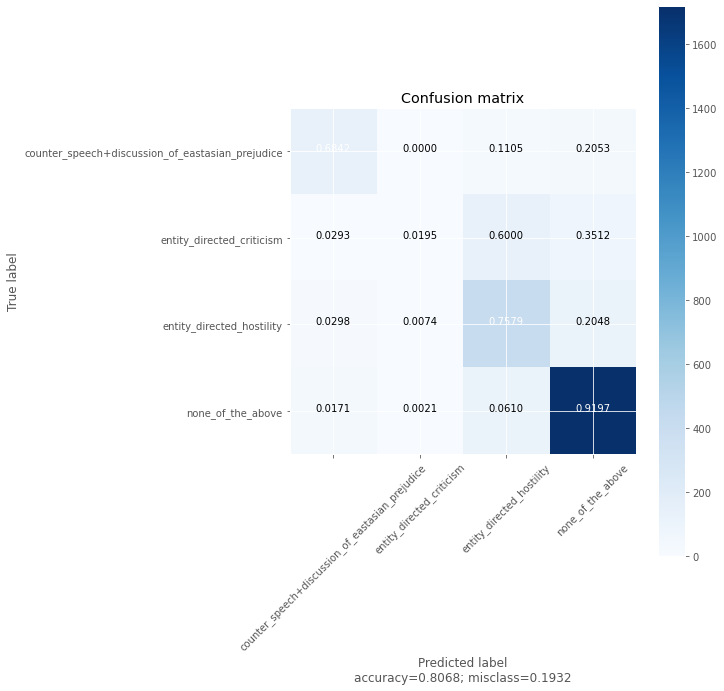

In [114]:
plot_confusion_matrix(cm,label_final,title='Confusion matrix')

In [132]:
fin_targets1 = np.array(fin_targets)
fin_outputs1 = np.array(fin_outputs)

In [134]:
from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(label_final)):
    fpr[i], tpr[i], _ = roc_curve(fin_targets1[:, i], fin_outputs1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

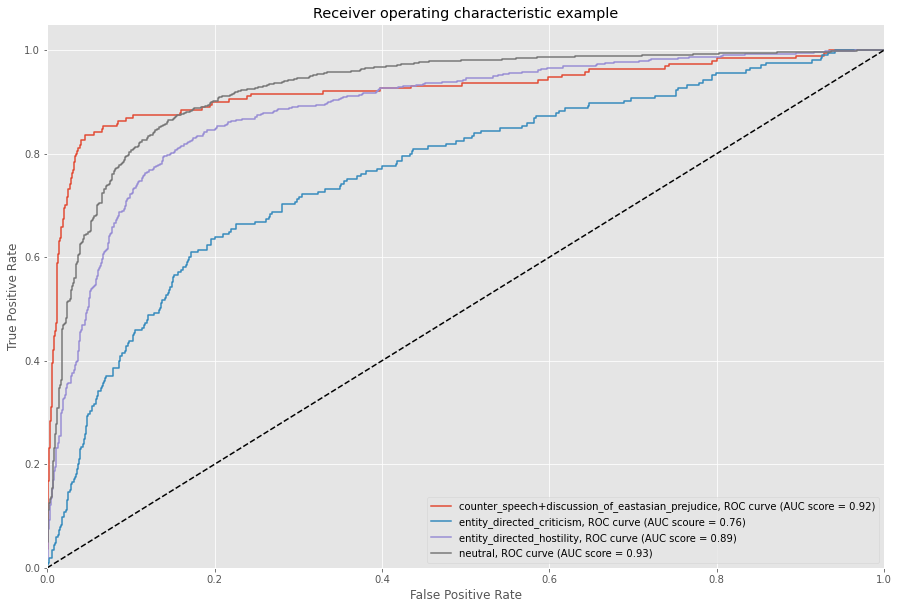

In [141]:
# Plot of a ROC curve for a specific class
plt.figure(figsize=(15,10))
plt.plot(fpr[0], tpr[0], label='counter_speech+discussion_of_eastasian_prejudice, ROC curve (AUC score = %0.2f)' % roc_auc[0])
plt.plot(fpr[1], tpr[1], label='entity_directed_criticism, ROC curve (AUC scoure = %0.2f)' % roc_auc[1])
plt.plot(fpr[2], tpr[2], label='entity_directed_hostility, ROC curve (AUC score = %0.2f)' % roc_auc[2])
plt.plot(fpr[3], tpr[3], label='neutral, ROC curve (AUC score = %0.2f)' % roc_auc[3])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [142]:
from sklearn.metrics import classification_report

In [147]:
from sklearn.metrics import classification_report
print('Classification Report:')
y_true1 = y_true.argmax(axis=1)
y_pred1 = y_pred.argmax(axis=1)
target_names = label_final
print(classification_report(y_true1, y_pred1, target_names=target_names,digits=4))

Classification Report:
                                                  precision    recall  f1-score   support

counter_speech+discussion_of_eastasian_prejudice     0.7065    0.6842    0.6952       190
                       entity_directed_criticism     0.3333    0.0195    0.0369       205
                       entity_directed_hostility     0.6120    0.7579    0.6772       537
                               none_of_the_above     0.8860    0.9197    0.9025      1868

                                        accuracy                         0.8068      2800
                                       macro avg     0.6345    0.5953    0.5780      2800
                                    weighted avg     0.7808    0.8068    0.7819      2800



## Fine tuning(freeze parameters in RoBERTa model to initilize the parameters in linear layers) version 2.0

In [74]:
def Finetuning(model, 
             optimizer, 
             train_iter, 
             valid_iter,
             valid_period = int(len(train_dataset)/TRAIN_BATCH_SIZE),
             scheduler = None,
             num_epochs = 5):
    # Pretrain linear layers, do not train bert
    for param in model.roberta.parameters():
        param.requires_grad = False
    
    
    # Initialize losses and loss histories
    train_loss = 0.0
    valid_loss = 0.0   
    global_step = 0  
    
    for epoch in range(num_epochs):
        count = 0
        for _,data in enumerate(train_iter, 0):
            source = data['ids'].to(device, dtype = torch.long)
            mask = data['mask'].to(device, dtype = torch.long)
            target = data['targets'].to(device, dtype = torch.float)
            y_pred = model(input_ids=source,  
                           attention_mask=mask)

            loss = torch.nn.BCEWithLogitsLoss()(y_pred, target)
            print('batch_no [{}/{}]:'.format(count, int(len(train_dataset)/TRAIN_BATCH_SIZE)),'training_loss:',loss)
            count+=1
            loss.backward()
            
            
            # Optimizer and scheduler step
            optimizer.step()    
            scheduler.step()
                
            optimizer.zero_grad()
            
            # Update train loss and global step
            train_loss += loss.item()
            global_step += 1

            # Validation loop. Save progress and evaluate model performance.
            if global_step % valid_period == 0:
                model.eval()
                
                with torch.no_grad():                    
                    for _,data in enumerate(valid_iter, 0):
                        source = data['ids'].to(device, dtype = torch.long)
                        mask = data['mask'].to(device, dtype = torch.long)
                        target = data['targets'].to(device, dtype = torch.float)
                        y_pred = model(input_ids=source, 
                                       attention_mask=mask)

                        
                        loss = torch.nn.BCEWithLogitsLoss()(y_pred, target)

                        
                        valid_loss += loss.item()

                # Store train and validation loss history
                train_loss = train_loss / valid_period
                valid_loss = valid_loss / len(valid_iter)

                # print summary
                print('Epoch [{}/{}], global step [{}/{}], Train Loss: {:.4f}, Valid Loss: {:.4f}'
                      .format(epoch+1, num_epochs, global_step, num_epochs*len(train_iter),
                              train_loss, valid_loss))
                
    
    print('finetuning done!')
    return model

In [153]:
NUM_EPOCHS = 3
steps_per_epoch = len(train_dataset)
optimizer = AdamW(model.parameters(), lr=1e-5)
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps=steps_per_epoch*1, 
                                          num_training_steps=steps_per_epoch*NUM_EPOCHS)
print("======================= Start finetuning ==============================")
model_fintuned = Finetuning(model=model, 
      train_iter=training_loader, 
      valid_iter=val_loader, 
      optimizer=optimizer, 
      scheduler=scheduler, 
      num_epochs=NUM_EPOCHS)

======================= Start finetuning ==============================
batch_no [0/1000]: training_loss: tensor(0.2886, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [1/1000]: training_loss: tensor(0.2721, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [2/1000]: training_loss: tensor(0.2784, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [3/1000]: training_loss: tensor(0.2891, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [4/1000]: training_loss: tensor(0.2919, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [5/1000]: training_loss: tensor(0.3168, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [6/1000]: training_loss: tensor(0.3828, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [7/1000]: training_loss: tensor(0.3004, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [8/1000

batch_no [72/1000]: training_loss: tensor(0.2954, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [73/1000]: training_loss: tensor(0.3392, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [74/1000]: training_loss: tensor(0.2414, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [75/1000]: training_loss: tensor(0.3410, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [76/1000]: training_loss: tensor(0.3325, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [77/1000]: training_loss: tensor(0.3080, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [78/1000]: training_loss: tensor(0.2609, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [79/1000]: training_loss: tensor(0.2802, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [80/1000]: training_loss: tensor(0.2243, device='cuda:0', grad_fn=<Bina

batch_no [143/1000]: training_loss: tensor(0.2966, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [144/1000]: training_loss: tensor(0.2925, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [145/1000]: training_loss: tensor(0.2621, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [146/1000]: training_loss: tensor(0.4235, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [147/1000]: training_loss: tensor(0.4451, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [148/1000]: training_loss: tensor(0.3080, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [149/1000]: training_loss: tensor(0.3294, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [150/1000]: training_loss: tensor(0.3659, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [151/1000]: training_loss: tensor(0.2815, device='cuda:0', grad

batch_no [214/1000]: training_loss: tensor(0.2666, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [215/1000]: training_loss: tensor(0.3017, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [216/1000]: training_loss: tensor(0.3502, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [217/1000]: training_loss: tensor(0.2618, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [218/1000]: training_loss: tensor(0.2954, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [219/1000]: training_loss: tensor(0.2946, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [220/1000]: training_loss: tensor(0.2808, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [221/1000]: training_loss: tensor(0.3099, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [222/1000]: training_loss: tensor(0.3655, device='cuda:0', grad

batch_no [285/1000]: training_loss: tensor(0.4189, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [286/1000]: training_loss: tensor(0.2790, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [287/1000]: training_loss: tensor(0.3549, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [288/1000]: training_loss: tensor(0.3085, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [289/1000]: training_loss: tensor(0.2309, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [290/1000]: training_loss: tensor(0.3316, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [291/1000]: training_loss: tensor(0.2665, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [292/1000]: training_loss: tensor(0.3087, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [293/1000]: training_loss: tensor(0.3223, device='cuda:0', grad

batch_no [357/1000]: training_loss: tensor(0.3508, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [358/1000]: training_loss: tensor(0.3060, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [359/1000]: training_loss: tensor(0.2721, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [360/1000]: training_loss: tensor(0.3558, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [361/1000]: training_loss: tensor(0.3374, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [362/1000]: training_loss: tensor(0.3164, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [363/1000]: training_loss: tensor(0.3449, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [364/1000]: training_loss: tensor(0.4038, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [365/1000]: training_loss: tensor(0.3433, device='cuda:0', grad

batch_no [429/1000]: training_loss: tensor(0.2603, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [430/1000]: training_loss: tensor(0.2864, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [431/1000]: training_loss: tensor(0.2884, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [432/1000]: training_loss: tensor(0.2861, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [433/1000]: training_loss: tensor(0.2999, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [434/1000]: training_loss: tensor(0.3661, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [435/1000]: training_loss: tensor(0.3444, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [436/1000]: training_loss: tensor(0.3087, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [437/1000]: training_loss: tensor(0.2841, device='cuda:0', grad

batch_no [501/1000]: training_loss: tensor(0.3214, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [502/1000]: training_loss: tensor(0.2909, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [503/1000]: training_loss: tensor(0.2622, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [504/1000]: training_loss: tensor(0.2568, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [505/1000]: training_loss: tensor(0.2714, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [506/1000]: training_loss: tensor(0.3158, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [507/1000]: training_loss: tensor(0.3069, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [508/1000]: training_loss: tensor(0.4000, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [509/1000]: training_loss: tensor(0.3142, device='cuda:0', grad

batch_no [574/1000]: training_loss: tensor(0.3506, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [575/1000]: training_loss: tensor(0.3196, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [576/1000]: training_loss: tensor(0.2517, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [577/1000]: training_loss: tensor(0.3753, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [578/1000]: training_loss: tensor(0.3101, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [579/1000]: training_loss: tensor(0.3217, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [580/1000]: training_loss: tensor(0.3188, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [581/1000]: training_loss: tensor(0.3020, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [582/1000]: training_loss: tensor(0.2954, device='cuda:0', grad

batch_no [645/1000]: training_loss: tensor(0.2623, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [646/1000]: training_loss: tensor(0.2715, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [647/1000]: training_loss: tensor(0.2803, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [648/1000]: training_loss: tensor(0.3218, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [649/1000]: training_loss: tensor(0.2310, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [650/1000]: training_loss: tensor(0.2956, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [651/1000]: training_loss: tensor(0.4220, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [652/1000]: training_loss: tensor(0.3339, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [653/1000]: training_loss: tensor(0.3204, device='cuda:0', grad

batch_no [717/1000]: training_loss: tensor(0.2438, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [718/1000]: training_loss: tensor(0.3768, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [719/1000]: training_loss: tensor(0.3334, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [720/1000]: training_loss: tensor(0.2839, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [721/1000]: training_loss: tensor(0.2375, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [722/1000]: training_loss: tensor(0.3180, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [723/1000]: training_loss: tensor(0.2909, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [724/1000]: training_loss: tensor(0.3459, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [725/1000]: training_loss: tensor(0.2733, device='cuda:0', grad

batch_no [788/1000]: training_loss: tensor(0.3033, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [789/1000]: training_loss: tensor(0.3594, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [790/1000]: training_loss: tensor(0.3229, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [791/1000]: training_loss: tensor(0.2555, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [792/1000]: training_loss: tensor(0.4082, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [793/1000]: training_loss: tensor(0.2961, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [794/1000]: training_loss: tensor(0.2651, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [795/1000]: training_loss: tensor(0.3407, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [796/1000]: training_loss: tensor(0.2897, device='cuda:0', grad

batch_no [860/1000]: training_loss: tensor(0.3466, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [861/1000]: training_loss: tensor(0.3632, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [862/1000]: training_loss: tensor(0.3127, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [863/1000]: training_loss: tensor(0.3828, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [864/1000]: training_loss: tensor(0.3239, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [865/1000]: training_loss: tensor(0.3643, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [866/1000]: training_loss: tensor(0.3327, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [867/1000]: training_loss: tensor(0.3714, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [868/1000]: training_loss: tensor(0.3208, device='cuda:0', grad

batch_no [932/1000]: training_loss: tensor(0.4024, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [933/1000]: training_loss: tensor(0.2449, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [934/1000]: training_loss: tensor(0.2985, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [935/1000]: training_loss: tensor(0.3126, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [936/1000]: training_loss: tensor(0.2625, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [937/1000]: training_loss: tensor(0.3280, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [938/1000]: training_loss: tensor(0.2575, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [939/1000]: training_loss: tensor(0.2952, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [940/1000]: training_loss: tensor(0.2901, device='cuda:0', grad

batch_no [3/1000]: training_loss: tensor(0.3353, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [4/1000]: training_loss: tensor(0.2330, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [5/1000]: training_loss: tensor(0.3246, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [6/1000]: training_loss: tensor(0.3336, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [7/1000]: training_loss: tensor(0.2715, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [8/1000]: training_loss: tensor(0.3596, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [9/1000]: training_loss: tensor(0.3415, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [10/1000]: training_loss: tensor(0.3750, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [11/1000]: training_loss: tensor(0.2682, device='cuda:0', grad_fn=<BinaryCross

batch_no [75/1000]: training_loss: tensor(0.3461, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [76/1000]: training_loss: tensor(0.3419, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [77/1000]: training_loss: tensor(0.2988, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [78/1000]: training_loss: tensor(0.2645, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [79/1000]: training_loss: tensor(0.3163, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [80/1000]: training_loss: tensor(0.3168, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [81/1000]: training_loss: tensor(0.2796, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [82/1000]: training_loss: tensor(0.2530, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [83/1000]: training_loss: tensor(0.3792, device='cuda:0', grad_fn=<Bina

batch_no [147/1000]: training_loss: tensor(0.2736, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [148/1000]: training_loss: tensor(0.3068, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [149/1000]: training_loss: tensor(0.2481, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [150/1000]: training_loss: tensor(0.2873, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [151/1000]: training_loss: tensor(0.3505, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [152/1000]: training_loss: tensor(0.3505, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [153/1000]: training_loss: tensor(0.3168, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [154/1000]: training_loss: tensor(0.3112, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [155/1000]: training_loss: tensor(0.3095, device='cuda:0', grad

batch_no [218/1000]: training_loss: tensor(0.3257, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [219/1000]: training_loss: tensor(0.2671, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [220/1000]: training_loss: tensor(0.3654, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [221/1000]: training_loss: tensor(0.3383, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [222/1000]: training_loss: tensor(0.2394, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [223/1000]: training_loss: tensor(0.3428, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [224/1000]: training_loss: tensor(0.2495, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [225/1000]: training_loss: tensor(0.2924, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [226/1000]: training_loss: tensor(0.3445, device='cuda:0', grad

batch_no [290/1000]: training_loss: tensor(0.3507, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [291/1000]: training_loss: tensor(0.3063, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [292/1000]: training_loss: tensor(0.3573, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [293/1000]: training_loss: tensor(0.3115, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [294/1000]: training_loss: tensor(0.4013, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [295/1000]: training_loss: tensor(0.3124, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [296/1000]: training_loss: tensor(0.4116, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [297/1000]: training_loss: tensor(0.2998, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [298/1000]: training_loss: tensor(0.2967, device='cuda:0', grad

batch_no [361/1000]: training_loss: tensor(0.3556, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [362/1000]: training_loss: tensor(0.2909, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [363/1000]: training_loss: tensor(0.3693, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [364/1000]: training_loss: tensor(0.3016, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [365/1000]: training_loss: tensor(0.2238, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [366/1000]: training_loss: tensor(0.3143, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [367/1000]: training_loss: tensor(0.3634, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [368/1000]: training_loss: tensor(0.3070, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [369/1000]: training_loss: tensor(0.2593, device='cuda:0', grad

batch_no [433/1000]: training_loss: tensor(0.3390, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [434/1000]: training_loss: tensor(0.3559, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [435/1000]: training_loss: tensor(0.2674, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [436/1000]: training_loss: tensor(0.3200, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [437/1000]: training_loss: tensor(0.2702, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [438/1000]: training_loss: tensor(0.3108, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [439/1000]: training_loss: tensor(0.3228, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [440/1000]: training_loss: tensor(0.2724, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [441/1000]: training_loss: tensor(0.3080, device='cuda:0', grad

batch_no [505/1000]: training_loss: tensor(0.3318, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [506/1000]: training_loss: tensor(0.2893, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [507/1000]: training_loss: tensor(0.2438, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [508/1000]: training_loss: tensor(0.4296, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [509/1000]: training_loss: tensor(0.2669, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [510/1000]: training_loss: tensor(0.3388, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [511/1000]: training_loss: tensor(0.3363, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [512/1000]: training_loss: tensor(0.3208, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [513/1000]: training_loss: tensor(0.2606, device='cuda:0', grad

batch_no [577/1000]: training_loss: tensor(0.3079, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [578/1000]: training_loss: tensor(0.2619, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [579/1000]: training_loss: tensor(0.3408, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [580/1000]: training_loss: tensor(0.3147, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [581/1000]: training_loss: tensor(0.2958, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [582/1000]: training_loss: tensor(0.2925, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [583/1000]: training_loss: tensor(0.2740, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [584/1000]: training_loss: tensor(0.3194, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [585/1000]: training_loss: tensor(0.2704, device='cuda:0', grad

batch_no [648/1000]: training_loss: tensor(0.3401, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [649/1000]: training_loss: tensor(0.3679, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [650/1000]: training_loss: tensor(0.3170, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [651/1000]: training_loss: tensor(0.2499, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [652/1000]: training_loss: tensor(0.3413, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [653/1000]: training_loss: tensor(0.2524, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [654/1000]: training_loss: tensor(0.3422, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [655/1000]: training_loss: tensor(0.2917, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [656/1000]: training_loss: tensor(0.4058, device='cuda:0', grad

batch_no [720/1000]: training_loss: tensor(0.2693, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [721/1000]: training_loss: tensor(0.3123, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [722/1000]: training_loss: tensor(0.3723, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [723/1000]: training_loss: tensor(0.3421, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [724/1000]: training_loss: tensor(0.2865, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [725/1000]: training_loss: tensor(0.2889, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [726/1000]: training_loss: tensor(0.3056, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [727/1000]: training_loss: tensor(0.2684, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [728/1000]: training_loss: tensor(0.3089, device='cuda:0', grad

batch_no [791/1000]: training_loss: tensor(0.2635, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [792/1000]: training_loss: tensor(0.3047, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [793/1000]: training_loss: tensor(0.2604, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [794/1000]: training_loss: tensor(0.4255, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [795/1000]: training_loss: tensor(0.3517, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [796/1000]: training_loss: tensor(0.2743, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [797/1000]: training_loss: tensor(0.3235, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [798/1000]: training_loss: tensor(0.3187, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [799/1000]: training_loss: tensor(0.2582, device='cuda:0', grad

batch_no [863/1000]: training_loss: tensor(0.2834, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [864/1000]: training_loss: tensor(0.3895, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [865/1000]: training_loss: tensor(0.3127, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [866/1000]: training_loss: tensor(0.2933, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [867/1000]: training_loss: tensor(0.3428, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [868/1000]: training_loss: tensor(0.3181, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [869/1000]: training_loss: tensor(0.2569, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [870/1000]: training_loss: tensor(0.2991, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [871/1000]: training_loss: tensor(0.3391, device='cuda:0', grad

batch_no [934/1000]: training_loss: tensor(0.3427, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [935/1000]: training_loss: tensor(0.3693, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [936/1000]: training_loss: tensor(0.3061, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [937/1000]: training_loss: tensor(0.2622, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [938/1000]: training_loss: tensor(0.3547, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [939/1000]: training_loss: tensor(0.3480, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [940/1000]: training_loss: tensor(0.3308, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [941/1000]: training_loss: tensor(0.3741, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [942/1000]: training_loss: tensor(0.3346, device='cuda:0', grad

batch_no [77/1000]: training_loss: tensor(0.2653, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [78/1000]: training_loss: tensor(0.3368, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [79/1000]: training_loss: tensor(0.2617, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [80/1000]: training_loss: tensor(0.2778, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [81/1000]: training_loss: tensor(0.3091, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [82/1000]: training_loss: tensor(0.3256, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [83/1000]: training_loss: tensor(0.2754, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [84/1000]: training_loss: tensor(0.3548, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [85/1000]: training_loss: tensor(0.3231, device='cuda:0', grad_fn=<Bina

batch_no [149/1000]: training_loss: tensor(0.2761, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [150/1000]: training_loss: tensor(0.3584, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [151/1000]: training_loss: tensor(0.2545, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [152/1000]: training_loss: tensor(0.2734, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [153/1000]: training_loss: tensor(0.3594, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [154/1000]: training_loss: tensor(0.3281, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [155/1000]: training_loss: tensor(0.3591, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [156/1000]: training_loss: tensor(0.2628, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [157/1000]: training_loss: tensor(0.3248, device='cuda:0', grad

batch_no [220/1000]: training_loss: tensor(0.3331, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [221/1000]: training_loss: tensor(0.2513, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [222/1000]: training_loss: tensor(0.3310, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [223/1000]: training_loss: tensor(0.2539, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [224/1000]: training_loss: tensor(0.3093, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [225/1000]: training_loss: tensor(0.2827, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [226/1000]: training_loss: tensor(0.2987, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [227/1000]: training_loss: tensor(0.2847, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [228/1000]: training_loss: tensor(0.3446, device='cuda:0', grad

batch_no [292/1000]: training_loss: tensor(0.2777, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [293/1000]: training_loss: tensor(0.3951, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [294/1000]: training_loss: tensor(0.3076, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [295/1000]: training_loss: tensor(0.2537, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [296/1000]: training_loss: tensor(0.3727, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [297/1000]: training_loss: tensor(0.3646, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [298/1000]: training_loss: tensor(0.3779, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [299/1000]: training_loss: tensor(0.2863, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [300/1000]: training_loss: tensor(0.4546, device='cuda:0', grad

batch_no [364/1000]: training_loss: tensor(0.2589, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [365/1000]: training_loss: tensor(0.3629, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [366/1000]: training_loss: tensor(0.3262, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [367/1000]: training_loss: tensor(0.3021, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [368/1000]: training_loss: tensor(0.2722, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [369/1000]: training_loss: tensor(0.2660, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [370/1000]: training_loss: tensor(0.3008, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [371/1000]: training_loss: tensor(0.3047, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [372/1000]: training_loss: tensor(0.2119, device='cuda:0', grad

batch_no [435/1000]: training_loss: tensor(0.3819, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [436/1000]: training_loss: tensor(0.3176, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [437/1000]: training_loss: tensor(0.3015, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [438/1000]: training_loss: tensor(0.3861, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [439/1000]: training_loss: tensor(0.3437, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [440/1000]: training_loss: tensor(0.2711, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [441/1000]: training_loss: tensor(0.2781, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [442/1000]: training_loss: tensor(0.2442, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [443/1000]: training_loss: tensor(0.3188, device='cuda:0', grad

batch_no [506/1000]: training_loss: tensor(0.2764, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [507/1000]: training_loss: tensor(0.3514, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [508/1000]: training_loss: tensor(0.3322, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [509/1000]: training_loss: tensor(0.4005, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [510/1000]: training_loss: tensor(0.2594, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [511/1000]: training_loss: tensor(0.2508, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [512/1000]: training_loss: tensor(0.2850, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [513/1000]: training_loss: tensor(0.3586, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [514/1000]: training_loss: tensor(0.4389, device='cuda:0', grad

batch_no [578/1000]: training_loss: tensor(0.3715, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [579/1000]: training_loss: tensor(0.3142, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [580/1000]: training_loss: tensor(0.3376, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [581/1000]: training_loss: tensor(0.2787, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [582/1000]: training_loss: tensor(0.2989, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [583/1000]: training_loss: tensor(0.3346, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [584/1000]: training_loss: tensor(0.2586, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [585/1000]: training_loss: tensor(0.3221, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [586/1000]: training_loss: tensor(0.2833, device='cuda:0', grad

batch_no [650/1000]: training_loss: tensor(0.2286, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [651/1000]: training_loss: tensor(0.3133, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [652/1000]: training_loss: tensor(0.3191, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [653/1000]: training_loss: tensor(0.2375, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [654/1000]: training_loss: tensor(0.3461, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [655/1000]: training_loss: tensor(0.2535, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [656/1000]: training_loss: tensor(0.2688, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [657/1000]: training_loss: tensor(0.3312, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [658/1000]: training_loss: tensor(0.3713, device='cuda:0', grad

batch_no [722/1000]: training_loss: tensor(0.2871, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [723/1000]: training_loss: tensor(0.2494, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [724/1000]: training_loss: tensor(0.2645, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [725/1000]: training_loss: tensor(0.2921, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [726/1000]: training_loss: tensor(0.2610, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [727/1000]: training_loss: tensor(0.3246, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [728/1000]: training_loss: tensor(0.2704, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [729/1000]: training_loss: tensor(0.2533, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [730/1000]: training_loss: tensor(0.2140, device='cuda:0', grad

batch_no [794/1000]: training_loss: tensor(0.2713, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [795/1000]: training_loss: tensor(0.2805, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [796/1000]: training_loss: tensor(0.3267, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [797/1000]: training_loss: tensor(0.2333, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [798/1000]: training_loss: tensor(0.3502, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [799/1000]: training_loss: tensor(0.3493, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [800/1000]: training_loss: tensor(0.4200, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [801/1000]: training_loss: tensor(0.2975, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [802/1000]: training_loss: tensor(0.3106, device='cuda:0', grad

batch_no [866/1000]: training_loss: tensor(0.3557, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [867/1000]: training_loss: tensor(0.2399, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [868/1000]: training_loss: tensor(0.2513, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [869/1000]: training_loss: tensor(0.3468, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [870/1000]: training_loss: tensor(0.3217, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [871/1000]: training_loss: tensor(0.2907, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [872/1000]: training_loss: tensor(0.2346, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [873/1000]: training_loss: tensor(0.3284, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [874/1000]: training_loss: tensor(0.3187, device='cuda:0', grad

batch_no [938/1000]: training_loss: tensor(0.2831, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [939/1000]: training_loss: tensor(0.3151, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [940/1000]: training_loss: tensor(0.2710, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [941/1000]: training_loss: tensor(0.2959, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [942/1000]: training_loss: tensor(0.2914, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [943/1000]: training_loss: tensor(0.2713, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [944/1000]: training_loss: tensor(0.2883, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [945/1000]: training_loss: tensor(0.3406, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [946/1000]: training_loss: tensor(0.3859, device='cuda:0', grad

In [154]:
fin_targets_fine = []
fin_outputs_fine = []
with torch.no_grad():                    
    for _,data in tqdm(enumerate(test_loader, 0)):
        source = data['ids'].to(device, dtype = torch.long)
        mask = data['mask'].to(device, dtype = torch.long)
        target = data['targets'].to(device, dtype = torch.float)
        y_pred = model_fintuned(input_ids=source, 
                       attention_mask=mask)
        fin_targets_fine.extend(target.cpu().detach().numpy().tolist())
        fin_outputs_fine.extend(torch.sigmoid(y_pred).cpu().detach().numpy().tolist())

350it [00:11, 30.29it/s]


In [155]:
outputs_final_fine = []
for i in fin_outputs_fine:
    temp = [0 for i in range(len(label_final))]
    index = i.index(max(i))
    temp[index] = 1
    outputs_final_fine.append(temp)

In [157]:
from sklearn import metrics
accuracy_fine = metrics.accuracy_score(fin_targets_fine, outputs_final_fine)
f1_score_micro_fine = metrics.f1_score(fin_targets_fine, outputs_final_fine, average='micro')
print(f"Accuracy Score = {accuracy_fine}")
print(f"F1 Score (Micro) = {f1_score_micro_fine}")

Accuracy Score = 0.8121428571428572
F1 Score (Micro) = 0.8121428571428572


In [158]:
fin_targets1_fine = np.array(fin_targets_fine)
fin_outputs1_fine = np.array(fin_outputs_fine)

In [161]:
from sklearn.metrics import roc_curve, auc
fpr_fine = dict()
tpr_fine = dict()
roc_auc_fine = dict()
for i in range(len(label_final)):
    fpr_fine[i], tpr_fine[i], _ = roc_curve(fin_targets1[:, i], fin_outputs1[:, i])
    roc_auc_fine[i] = auc(fpr[i], tpr[i])

## in-domain test

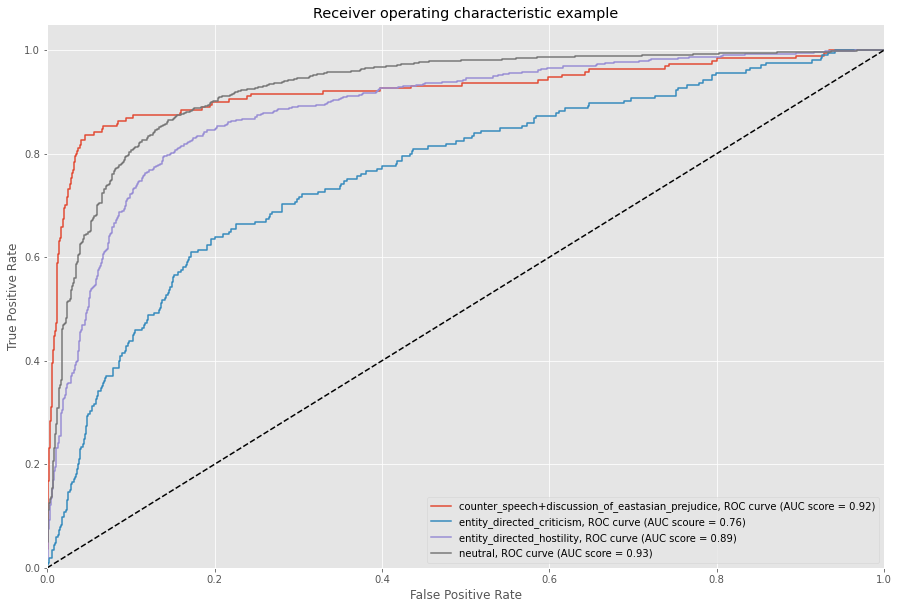

In [162]:
# Plot of a ROC curve for a specific class
plt.figure(figsize=(15,10))
plt.plot(fpr_fine[0], tpr_fine[0], label='counter_speech+discussion_of_eastasian_prejudice, ROC curve (AUC score = %0.2f)' % roc_auc_fine[0])
plt.plot(fpr_fine[1], tpr_fine[1], label='entity_directed_criticism, ROC curve (AUC scoure = %0.2f)' % roc_auc_fine[1])
plt.plot(fpr_fine[2], tpr_fine[2], label='entity_directed_hostility, ROC curve (AUC score = %0.2f)' % roc_auc_fine[2])
plt.plot(fpr_fine[3], tpr_fine[3], label='neutral, ROC curve (AUC score = %0.2f)' % roc_auc_fine[3])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [163]:
y_pred_fine = np.array(outputs_final_fine)
y_true_fine = np.array(fin_targets_fine)

In [164]:
from sklearn.metrics import classification_report
print('Classification Report:')
y_true2 = y_true_fine.argmax(axis=1)
y_pred2 = y_pred_fine.argmax(axis=1)
target_names = label_final
print(classification_report(y_true2, y_pred2, target_names=target_names,digits=4))

Classification Report:
                                                  precision    recall  f1-score   support

counter_speech+discussion_of_eastasian_prejudice     0.7151    0.6737    0.6938       190
                       entity_directed_criticism     0.5385    0.0341    0.0642       205
                       entity_directed_hostility     0.6233    0.7579    0.6840       537
                               none_of_the_above     0.8859    0.9272    0.9061      1868

                                        accuracy                         0.8121      2800
                                       macro avg     0.6907    0.5982    0.5870      2800
                                    weighted avg     0.7985    0.8121    0.7875      2800



## cross test on 2400 Covid data (version 2.0)

In [53]:
sample_2400 = pd.read_csv('Data/test5.csv',sep=',')

In [54]:
sample_2400.head()

,comment,attack
0,fucking piece of shit your whole community is...,1
1,im not being funny but coronavirus in china ir...,0
2,got on the victoria line today to seven sister...,1
3,it s appalling that the media amp libtards bit...,1
4,dude fuck the chinese man fuck em and if you t...,1


In [55]:
sample_2400.rename(columns= {'attack':'label'},inplace=True)

In [56]:
training_2400 = CustomDataset(sample_2400, tokenizer, MAX_LEN)

In [57]:
test_loader_2400 = DataLoader(training_2400, **test_params)

In [60]:
fin_targets_2400 = []
fin_outputs_2400 = []
with torch.no_grad():                    
    for _,data in tqdm(enumerate(test_loader_2400, 0)):
        source = data['ids'].to(device, dtype = torch.long)
        mask = data['mask'].to(device, dtype = torch.long)
        target = data['targets'].to(device, dtype = torch.float)
        y_pred = model(input_ids=source, 
                       attention_mask=mask)
        fin_targets_2400.extend(target.cpu().detach().numpy().tolist())
        fin_outputs_2400.extend(torch.sigmoid(y_pred).cpu().detach().numpy().tolist())

290it [00:09, 30.88it/s]


In [62]:
outputs_final_2400 = []
for i in fin_outputs_2400:
    temp = [0 for i in range(len(label_final))]
    index = i.index(max(i))
    temp[index] = 1
    outputs_final_2400.append(temp)

In [63]:
label_2400_final = []
prob_2400 = []
for m in outputs_final_2400:
    if m[-1] == 1:
        label_2400_final.append(0)
    elif m[1] == 1:
        label_2400_final.append(0)
    else:
        label_2400_final.append(1)
for m in fin_outputs_2400:
    prob_2400.append((m[1]+m[2])/sum(m))

In [64]:
y_true_2400 = sample_2400['label']

Classification Report:
              precision    recall  f1-score   support

           1     0.5434    0.6932    0.6092       678
           0     0.8569    0.7593    0.8052      1641

    accuracy                         0.7400      2319
   macro avg     0.7001    0.7263    0.7072      2319
weighted avg     0.7653    0.7400    0.7479      2319



[Text(0, 0.5, 'Attack'), Text(0, 1.5, 'Not attack')]

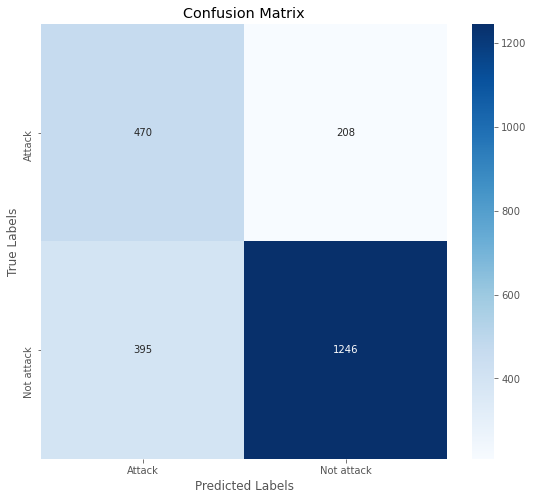

In [65]:
#test3 double text
from sklearn.metrics import roc_auc_score
print('Classification Report:')
print(classification_report(y_true_2400, label_2400_final, labels=[1,0], digits=4))

cm = confusion_matrix(y_true_2400, label_2400_final, labels=[1,0])
plt.figure(1, figsize=(20,8))

ax= plt.subplot(121)
sns.heatmap(cm, annot=True, ax = ax, cmap='Blues', fmt="d")
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.xaxis.set_ticklabels(['Attack', 'Not attack'])
ax.yaxis.set_ticklabels(['Attack', 'Not attack'])

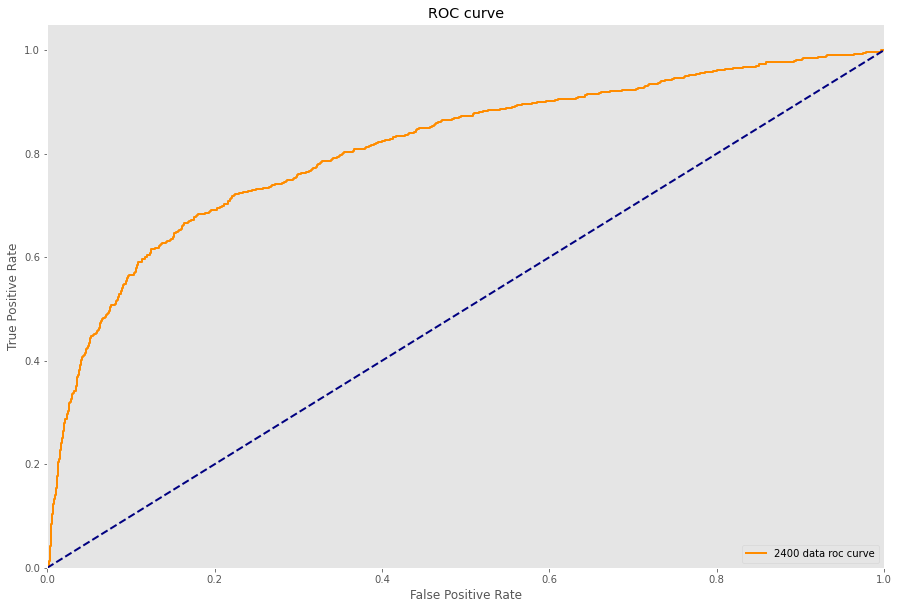

In [67]:
from sklearn.metrics import roc_curve, auc
fpr_rt_lm, tpr_rt_lm, _ = roc_curve(y_true_2400, prob_2400)
lw = 2
plt.figure(figsize=(15,10))
plt.plot(fpr_rt_lm, tpr_rt_lm, color='darkorange',
         lw=lw, label='2400 data roc curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

## Fine tune the linear layers on 2400 data(version3.0)

In [68]:
sample_2400.head()

,comment,label
0,fucking piece of shit your whole community is...,1
1,im not being funny but coronavirus in china ir...,0
2,got on the victoria line today to seven sister...,1
3,it s appalling that the media amp libtards bit...,1
4,dude fuck the chinese man fuck em and if you t...,1


In [69]:
label_calabrated = []
for i in sample_2400['label']:
    if i == 1:
        label_calabrated.append([0,1,1,0])
    else:
        label_calabrated.append([1,0,0,1])

In [70]:
sample_2400['label'] = label_calabrated

In [71]:
train_size = 0.7
val_size = 0.3
train_dataset_2400 =sample_2400.sample(frac=train_size,random_state=200)
test_dataset_2400 = sample_2400.drop(train_dataset_2400.index).reset_index(drop=True)

val_dataset_2400=test_dataset_2400.sample(frac=val_size,random_state=200)
test_dataset_2400 =test_dataset_2400.drop(val_dataset_2400.index).reset_index(drop=True)

train_dataset_2400 = train_dataset_2400.reset_index(drop=True)
val_dataset_2400 = val_dataset_2400.reset_index(drop=True)

print("FULL Dataset: {}".format(sample_2400.shape))
print("TRAIN Dataset: {}".format(train_dataset_2400.shape))
print("Val Dataset: {}".format(val_dataset_2400.shape))
print("TEST Dataset: {}".format(test_dataset_2400.shape))

training_set_2400 = CustomDataset(train_dataset_2400, tokenizer, MAX_LEN)
testing_set_2400 = CustomDataset(test_dataset_2400, tokenizer, MAX_LEN)
val_set_2400 = CustomDataset(val_dataset_2400, tokenizer, MAX_LEN)

FULL Dataset: (2319, 2)
TRAIN Dataset: (1623, 2)
Val Dataset: (209, 2)
TEST Dataset: (487, 2)


In [72]:
train_params = {'batch_size': TRAIN_BATCH_SIZE,
                'shuffle': True,
                'num_workers': 0
                }

val_params = {'batch_size': VALID_BATCH_SIZE,
                'shuffle': True,
                'num_workers': 0
                }
test_params = {'batch_size': VALID_BATCH_SIZE,
                'shuffle': True,
                'num_workers': 0
                }
training_loader_2400 = DataLoader(training_set_2400, **train_params)
val_loader_2400 = DataLoader(val_set_2400, **val_params)
test_loader_2400 = DataLoader(testing_set_2400, **test_params)

In [82]:
NUM_EPOCHS = 5
steps_per_epoch = len(train_dataset)
optimizer = AdamW(model.parameters(), lr=1e-5)
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps=steps_per_epoch*1, 
                                          num_training_steps=steps_per_epoch*NUM_EPOCHS)
print("======================= Start finetuning ==============================")
model_fintuned_2400 = Finetuning(model=model, 
      train_iter=training_loader_2400, 
      valid_iter=val_loader_2400, 
      optimizer=optimizer, 
      scheduler=scheduler, 
      num_epochs=NUM_EPOCHS)

======================= Start finetuning ==============================
batch_no [0/1000]: training_loss: tensor(0.6921, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [1/1000]: training_loss: tensor(0.7719, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [2/1000]: training_loss: tensor(0.8380, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [3/1000]: training_loss: tensor(0.6809, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [4/1000]: training_loss: tensor(0.7969, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [5/1000]: training_loss: tensor(0.7094, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [6/1000]: training_loss: tensor(0.7403, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [7/1000]: training_loss: tensor(0.7655, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [8/1000

batch_no [73/1000]: training_loss: tensor(0.6926, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [74/1000]: training_loss: tensor(0.8955, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [75/1000]: training_loss: tensor(0.7511, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [76/1000]: training_loss: tensor(0.6431, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [77/1000]: training_loss: tensor(0.6047, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [78/1000]: training_loss: tensor(0.7239, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [79/1000]: training_loss: tensor(0.7369, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [80/1000]: training_loss: tensor(0.7956, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [81/1000]: training_loss: tensor(0.6740, device='cuda:0', grad_fn=<Bina

batch_no [44/1000]: training_loss: tensor(0.8038, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [45/1000]: training_loss: tensor(0.7015, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [46/1000]: training_loss: tensor(0.7115, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [47/1000]: training_loss: tensor(0.7993, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [48/1000]: training_loss: tensor(0.6702, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [49/1000]: training_loss: tensor(0.7580, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [50/1000]: training_loss: tensor(0.7857, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [51/1000]: training_loss: tensor(0.6025, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [52/1000]: training_loss: tensor(0.8367, device='cuda:0', grad_fn=<Bina

batch_no [14/1000]: training_loss: tensor(0.8242, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [15/1000]: training_loss: tensor(0.8800, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [16/1000]: training_loss: tensor(0.9620, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [17/1000]: training_loss: tensor(0.7963, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [18/1000]: training_loss: tensor(0.7389, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [19/1000]: training_loss: tensor(0.6535, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [20/1000]: training_loss: tensor(0.6490, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [21/1000]: training_loss: tensor(0.9369, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [22/1000]: training_loss: tensor(0.6828, device='cuda:0', grad_fn=<Bina

batch_no [87/1000]: training_loss: tensor(0.9003, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [88/1000]: training_loss: tensor(0.7381, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [89/1000]: training_loss: tensor(0.7059, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [90/1000]: training_loss: tensor(0.6534, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [91/1000]: training_loss: tensor(0.6969, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [92/1000]: training_loss: tensor(0.7625, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [93/1000]: training_loss: tensor(0.7437, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [94/1000]: training_loss: tensor(0.7717, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [95/1000]: training_loss: tensor(0.7028, device='cuda:0', grad_fn=<Bina

batch_no [57/1000]: training_loss: tensor(0.6628, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [58/1000]: training_loss: tensor(0.8985, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [59/1000]: training_loss: tensor(0.7520, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [60/1000]: training_loss: tensor(0.8802, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [61/1000]: training_loss: tensor(0.6237, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [62/1000]: training_loss: tensor(0.6925, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [63/1000]: training_loss: tensor(0.8134, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [64/1000]: training_loss: tensor(0.7133, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [65/1000]: training_loss: tensor(0.6761, device='cuda:0', grad_fn=<Bina

batch_no [28/1000]: training_loss: tensor(0.6971, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [29/1000]: training_loss: tensor(0.7080, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [30/1000]: training_loss: tensor(0.8260, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [31/1000]: training_loss: tensor(0.6996, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [32/1000]: training_loss: tensor(0.6694, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [33/1000]: training_loss: tensor(0.7635, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [34/1000]: training_loss: tensor(0.8138, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [35/1000]: training_loss: tensor(0.7004, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
batch_no [36/1000]: training_loss: tensor(0.7738, device='cuda:0', grad_fn=<Bina

In [83]:
fin_targets_2400_fine = []
fin_outputs_2400_fine = []
with torch.no_grad():                    
    for _,data in tqdm(enumerate(test_loader_2400, 0)):
        source = data['ids'].to(device, dtype = torch.long)
        mask = data['mask'].to(device, dtype = torch.long)
        target = data['targets'].to(device, dtype = torch.float)
        y_pred = model_fintuned_2400(input_ids=source, 
                       attention_mask=mask)
        fin_targets_2400_fine.extend(target.cpu().detach().numpy().tolist())
        fin_outputs_2400_fine.extend(torch.sigmoid(y_pred).cpu().detach().numpy().tolist())

61it [00:02, 26.36it/s]


In [84]:
outputs_final_fine_2400 = []
for i in fin_outputs_2400_fine:
    temp = [0 for i in range(len(label_final))]
    index = i.index(max(i))
    temp[index] = 1
    outputs_final_fine_2400.append(temp)

In [85]:
label_2400_final_fine = []
prob_2400_fine = []
for m in outputs_final_fine_2400:
    if m[-1] == 1:
        label_2400_final_fine.append(0)
    elif m[1] == 1:
        label_2400_final_fine.append(0)
    else:
        label_2400_final_fine.append(1)
for m in fin_outputs_2400_fine:
    prob_2400_fine.append((m[1]+m[2])/sum(m))

In [86]:
true_2400_final_fine = []
for m in fin_targets_2400_fine:
    if m[-1] == 1:
        true_2400_final_fine.append(0)
    elif m[1] == 1:
        true_2400_final_fine.append(1)

Classification Report:
              precision    recall  f1-score   support

           1     0.5412    0.6174    0.5768       149
           0     0.8202    0.7692    0.7939       338

    accuracy                         0.7228       487
   macro avg     0.6807    0.6933    0.6853       487
weighted avg     0.7348    0.7228    0.7275       487



[Text(0, 0.5, 'Attack'), Text(0, 1.5, 'Not attack')]

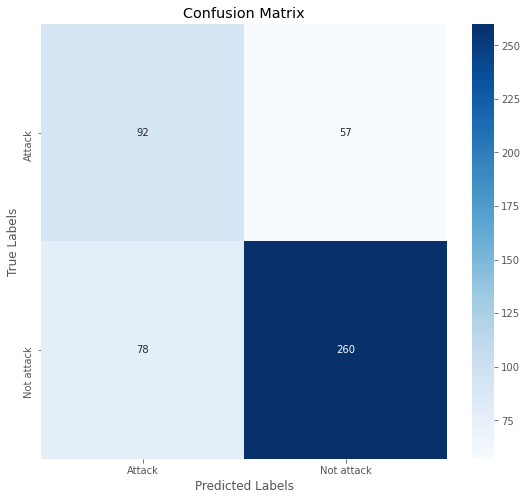

In [87]:
#test3 double text
from sklearn.metrics import roc_auc_score
print('Classification Report:')
print(classification_report(true_2400_final_fine, label_2400_final_fine, labels=[1,0], digits=4))

cm = confusion_matrix(true_2400_final_fine, label_2400_final_fine, labels=[1,0])
plt.figure(1, figsize=(20,8))

ax= plt.subplot(121)
sns.heatmap(cm, annot=True, ax = ax, cmap='Blues', fmt="d")
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.xaxis.set_ticklabels(['Attack', 'Not attack'])
ax.yaxis.set_ticklabels(['Attack', 'Not attack'])

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr_rt_lm, tpr_rt_lm, _ = roc_curve(y_true_2400, prob_2400)
lw = 2
plt.figure(figsize=(15,10))
plt.plot(fpr_rt_lm, tpr_rt_lm, color='darkorange',
         lw=lw, label='2400 data roc curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()